In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
df = pd.read_parquet('seoul.parquet')

In [102]:
df.drop('Unnamed: 0', axis =1, inplace=True)

In [103]:
df.head()

Duration  Distance      PLong       PLatd  ...  Solar  Snow  GroundTemp  Dust
0         3        50  37.544666  126.888359  ...    0.0   0.0        -2.2  25.0
1        24      7670  37.506199  127.003944  ...    0.0   0.0        -2.2  25.0
2         8      1390  37.544590  127.057083  ...    0.0   0.0        -2.2  25.0
3         8      1820  37.571102  127.023560  ...    0.0   0.0        -2.2  25.0
4         4       850  37.573242  127.015907  ...    0.0   0.0        -2.2  25.0

[5 rows x 25 columns]

In [104]:
df.columns

Index(['Duration', 'Distance', 'PLong', 'PLatd', 'DLong', 'DLatd', 'Haversine',
       'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek', 'Dmonth', 'Dday', 'Dhour',
       'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow',
       'GroundTemp', 'Dust'],
      dtype='object')

In [105]:
df['Phour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [106]:
def reduce_mem_usage(props):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings
            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",props[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all(): 
                NAlist.append(col)
                props[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            result = (props[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True

            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)    
            
            # Make float datatypes 32 bit
            else:
                props[col] = props[col].astype(np.float32)
            
            # Print new column type
            print("dtype after: ",props[col].dtype)
            print("******************************")
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist

In [107]:
props, NAlist = reduce_mem_usage(df)
print("_________________")
print("")
print("Warning: the following columns have missing values filled with 'df['column_name'].min() -1': ")
print("_________________")
print("")
print(NAlist)

Memory usage of properties dataframe is : 1831.2720565795898  MB
******************************
Column:  Duration
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  Distance
dtype before:  int64
dtype after:  uint16
******************************
******************************
Column:  PLong
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  PLatd
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  DLong
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  DLatd
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  Haversine
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  Pmonth
dtype before:  int64
dtype afte

In [108]:
df.shape

(9601139, 25)

In [109]:
df.isnull().any()

Duration      False
Distance      False
PLong         False
PLatd         False
DLong         False
DLatd         False
Haversine     False
Pmonth        False
Pday          False
Phour         False
Pmin          False
PDweek        False
Dmonth        False
Dday          False
Dhour         False
Dmin          False
DDweek        False
Temp          False
Precip        False
Wind          False
Humid         False
Solar         False
Snow          False
GroundTemp    False
Dust          False
dtype: bool

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9601139 entries, 0 to 9601138
Data columns (total 25 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Duration    uint8  
 1   Distance    uint16 
 2   PLong       float32
 3   PLatd       float32
 4   DLong       float32
 5   DLatd       float32
 6   Haversine   float32
 7   Pmonth      uint8  
 8   Pday        uint8  
 9   Phour       uint8  
 10  Pmin        uint8  
 11  PDweek      uint8  
 12  Dmonth      uint8  
 13  Dday        uint8  
 14  Dhour       uint8  
 15  Dmin        uint8  
 16  DDweek      uint8  
 17  Temp        float32
 18  Precip      float32
 19  Wind        float32
 20  Humid       uint8  
 21  Solar       float32
 22  Snow        float32
 23  GroundTemp  float32
 24  Dust        uint16 
dtypes: float32(11), uint16(2), uint8(12)
memory usage: 549.4 MB


In [111]:
df = df.drop(['PLong', 'PLatd', 'DLong', 'DLatd'], axis = 1)

In [112]:
df

Duration  Distance  Haversine  Pmonth  ...  Solar  Snow  GroundTemp  Dust
0               3        50   0.000000       1  ...    0.0   0.0        -2.2    25
1              24      7670   5.713529       1  ...    0.0   0.0        -2.2    25
2               8      1390   0.913702       1  ...    0.0   0.0        -2.2    25
3               8      1820   1.468027       1  ...    0.0   0.0        -2.2    25
4               4       850   0.823227       1  ...    0.0   0.0        -2.2    25
...           ...       ...        ...     ...  ...    ...   ...         ...   ...
9601134        67      6930   0.000000      12  ...    0.0   0.0        -5.1    53
9601135        58      8320   4.402263      12  ...    0.0   0.0        -5.1    53
9601136       118      2730   1.389156      12  ...    0.0   0.0        -5.0    49
9601137        90     17170   8.779306      12  ...    0.0   0.0        -5.1    53
9601138       116      1410   0.000000      12  ...    0.0   0.0        -5.1    53

[9601139 rows x 21 columns]

In [16]:
df['Precip'].value_counts()

0.0     9485238
0.5       38451
0.1       22246
1.0       10774
1.5        8483
2.0        4916
4.0        4609
0.2        4156
0.4        2723
0.9        2514
3.5        2277
0.3        1935
2.5        1364
1.3        1273
6.4        1014
1.1         958
21.5        694
3.0         682
5.0         662
4.5         654
7.3         573
5.5         449
6.5         406
1.6         377
0.8         329
1.8         274
18.0        273
13.5        249
11.5        194
3.3         181
8.0         180
13.0        176
5.4         170
29.5        152
35.0        147
7.0         145
9.5         144
18.5        130
6.0         107
9.0         105
1.4          99
10.5         72
4.9          70
24.0         65
1.2          57
19.0         52
8.5          45
9.1          39
2.4          36
3.7          34
17.0         31
10.0         29
1.9          23
21.0         20
14.5         19
12.5         17
15.5         15
12.0         12
7.5          10
16.0         10
Name: Precip, dtype: int64

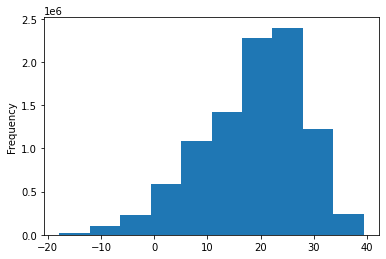

In [17]:
df['Temp'].plot.hist()

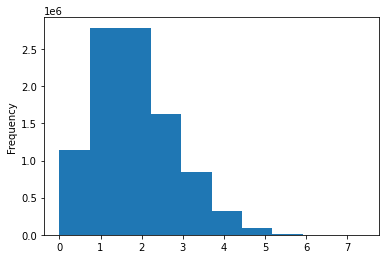

In [18]:
df['Wind'].plot.hist()

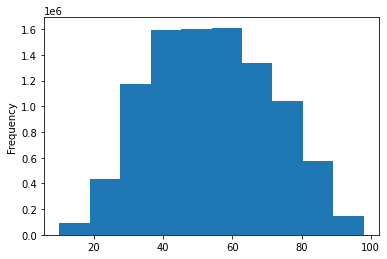

In [19]:
df['Humid'].plot.hist()

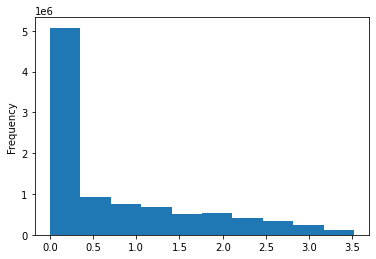

In [20]:
df['Solar'].plot.hist()

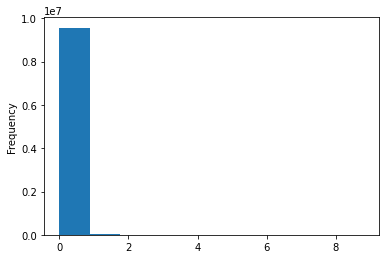

In [21]:
df['Snow'].plot.hist()

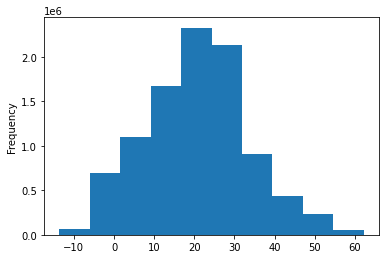

In [22]:
df['GroundTemp'].plot.hist()

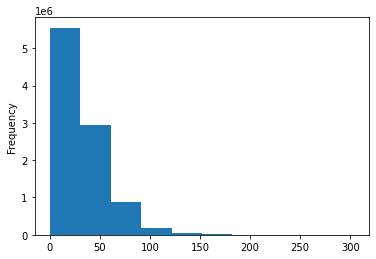

In [23]:
df['Dust'].plot.hist()

In [24]:
cols = ['Distance', 'Haversine', 'Temp', 'Precip', 'Wind', 'Solar', 'Snow', 'Humid', 'GroundTemp', 'Dust']

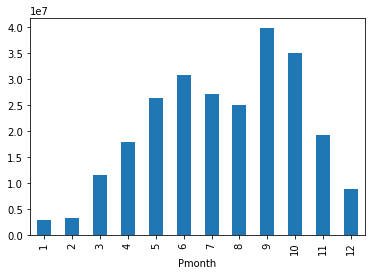

In [25]:
df.groupby('Pmonth')['Duration'].sum().plot(kind = 'bar')

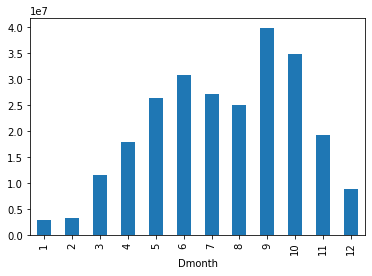

In [26]:
df.groupby('Dmonth')['Duration'].sum().plot(kind = 'bar')

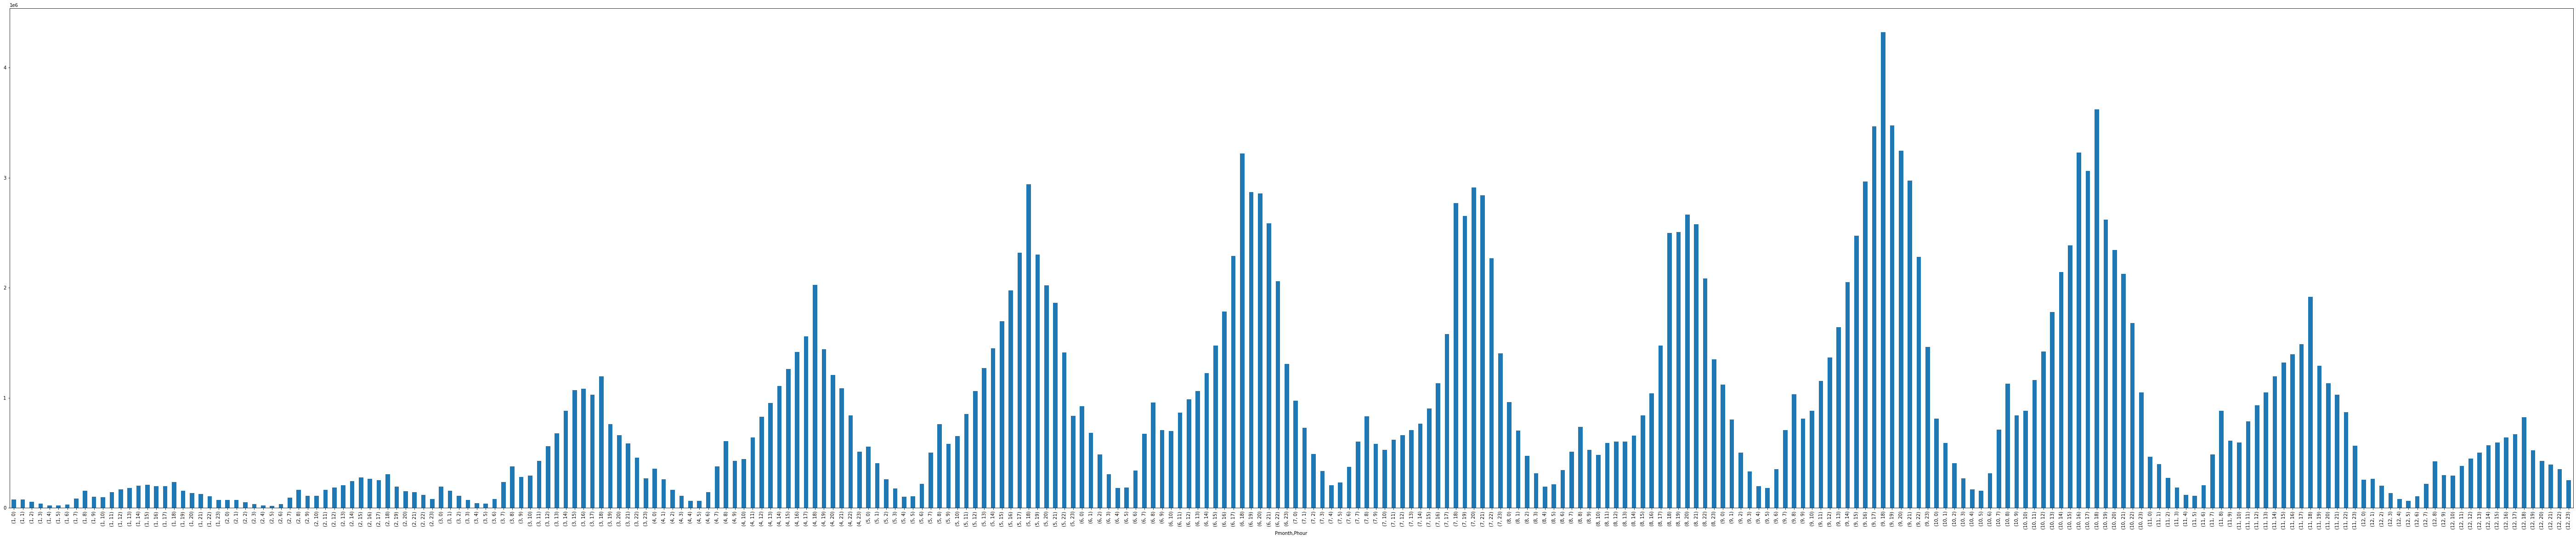

In [27]:
plt.figure(figsize = (100, 20))
ax = plt.axes()
ax.set_facecolor("white")
df.groupby(['Pmonth', 'Phour'])['Duration'].sum().plot(kind = 'bar')
plt.show()

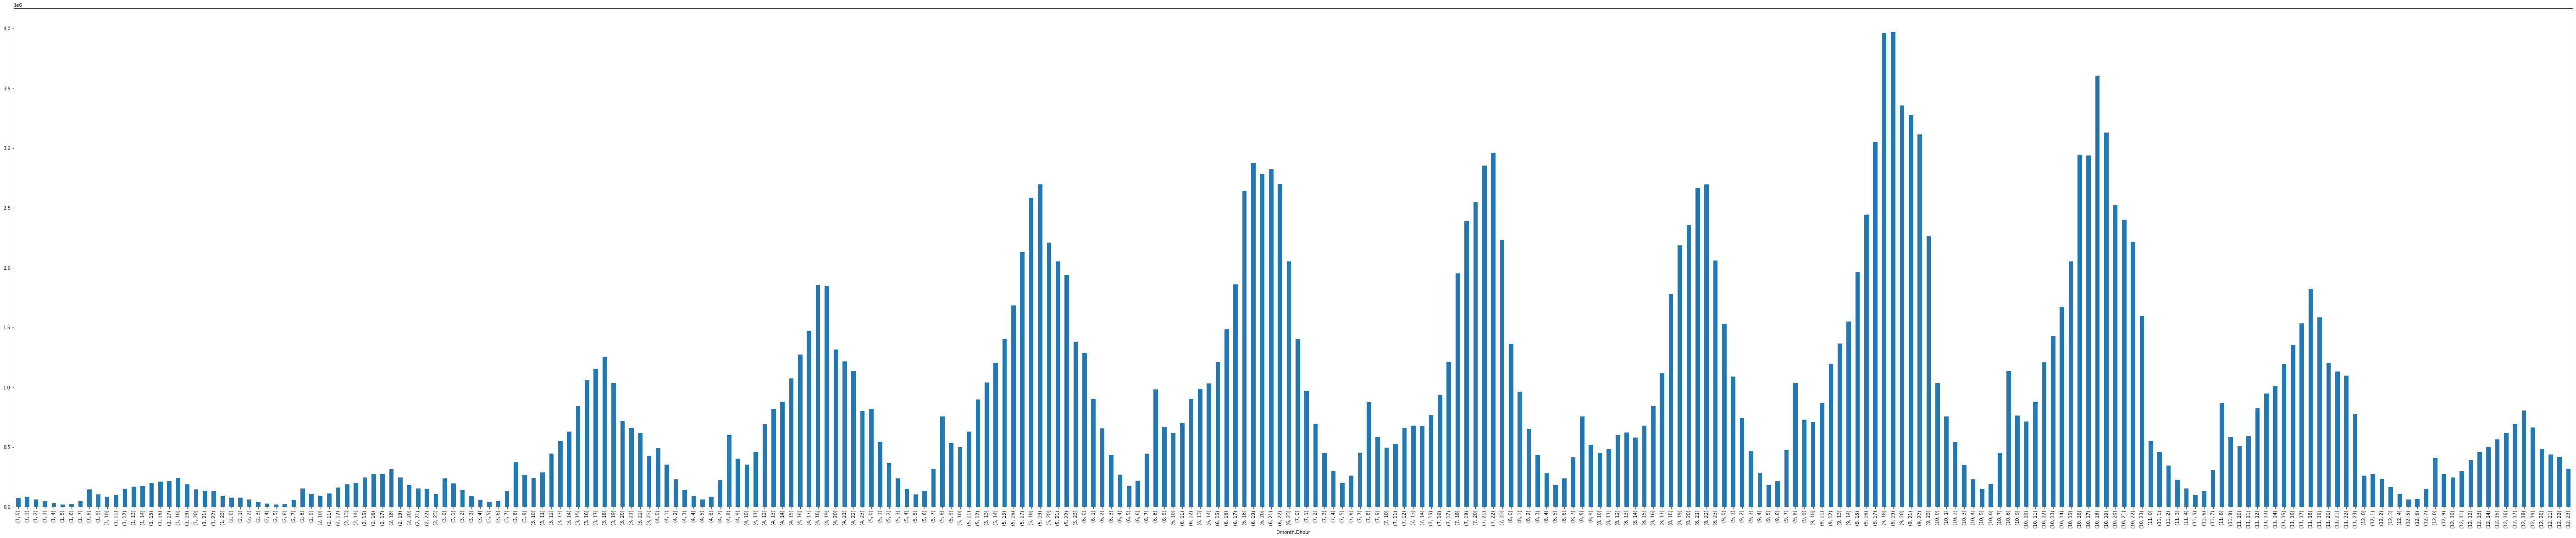

In [28]:
plt.figure(figsize = (100, 20))
ax = plt.axes()
ax.set_facecolor("white")
df.groupby(['Dmonth', 'Dhour'])['Duration'].sum().plot(kind = 'bar')
plt.show()

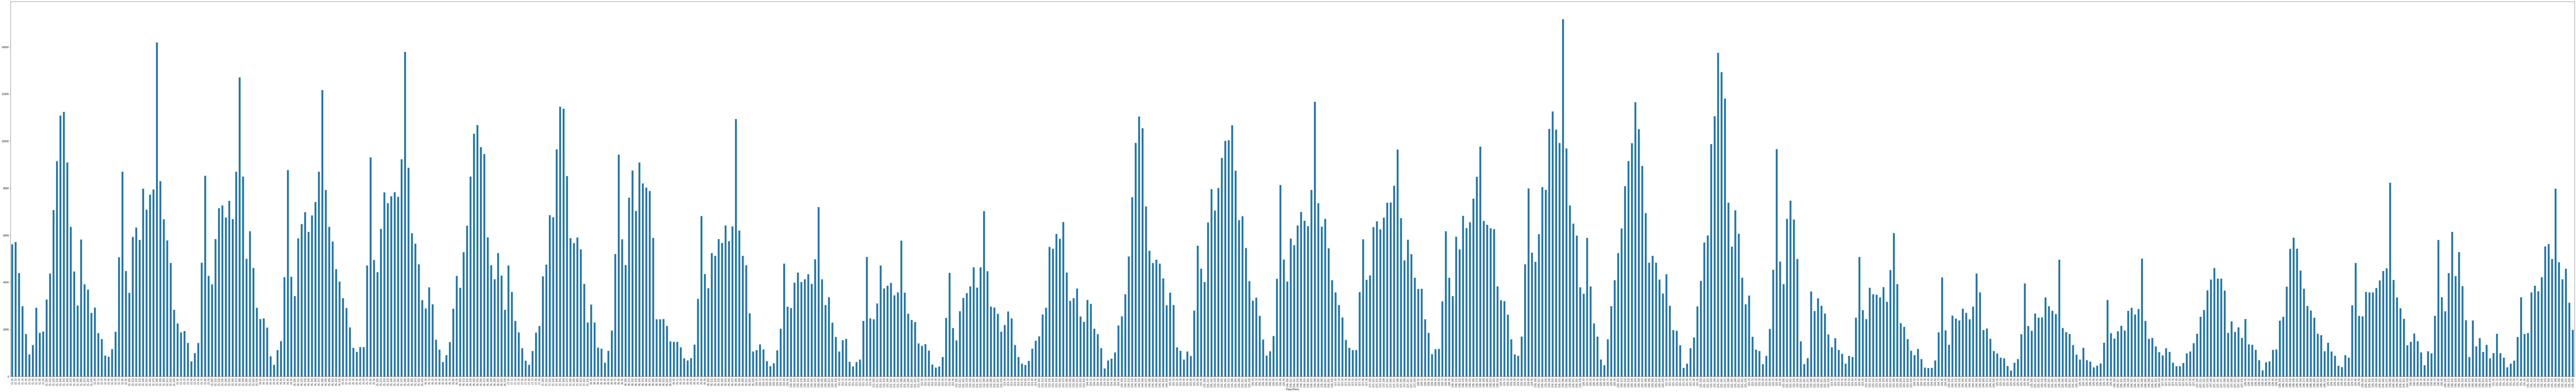

In [29]:
plt.figure(figsize = (200, 30))
ax = plt.axes()
ax.set_facecolor("white")
df[df['Pmonth'] == 1].groupby(['Pday', 'Phour'])['Duration'].sum().plot(kind = 'bar')
plt.show()

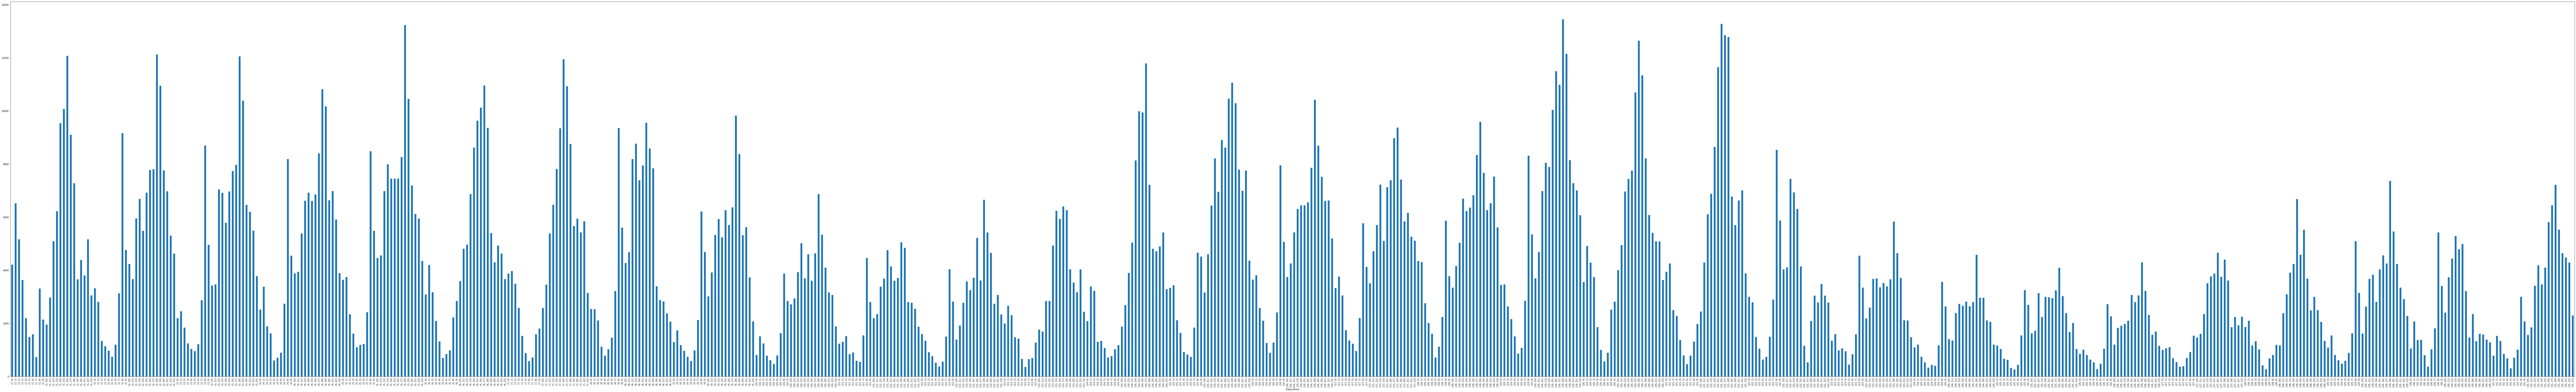

In [30]:
plt.figure(figsize = (200, 30))
ax = plt.axes()
ax.set_facecolor("white")
df[df['Dmonth'] == 1].groupby(['Dday', 'Dhour'])['Duration'].sum().plot(kind = 'bar')
plt.show()

In [31]:
df['PDweek'].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=uint8)

In [32]:
df['DDweek'].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=uint8)

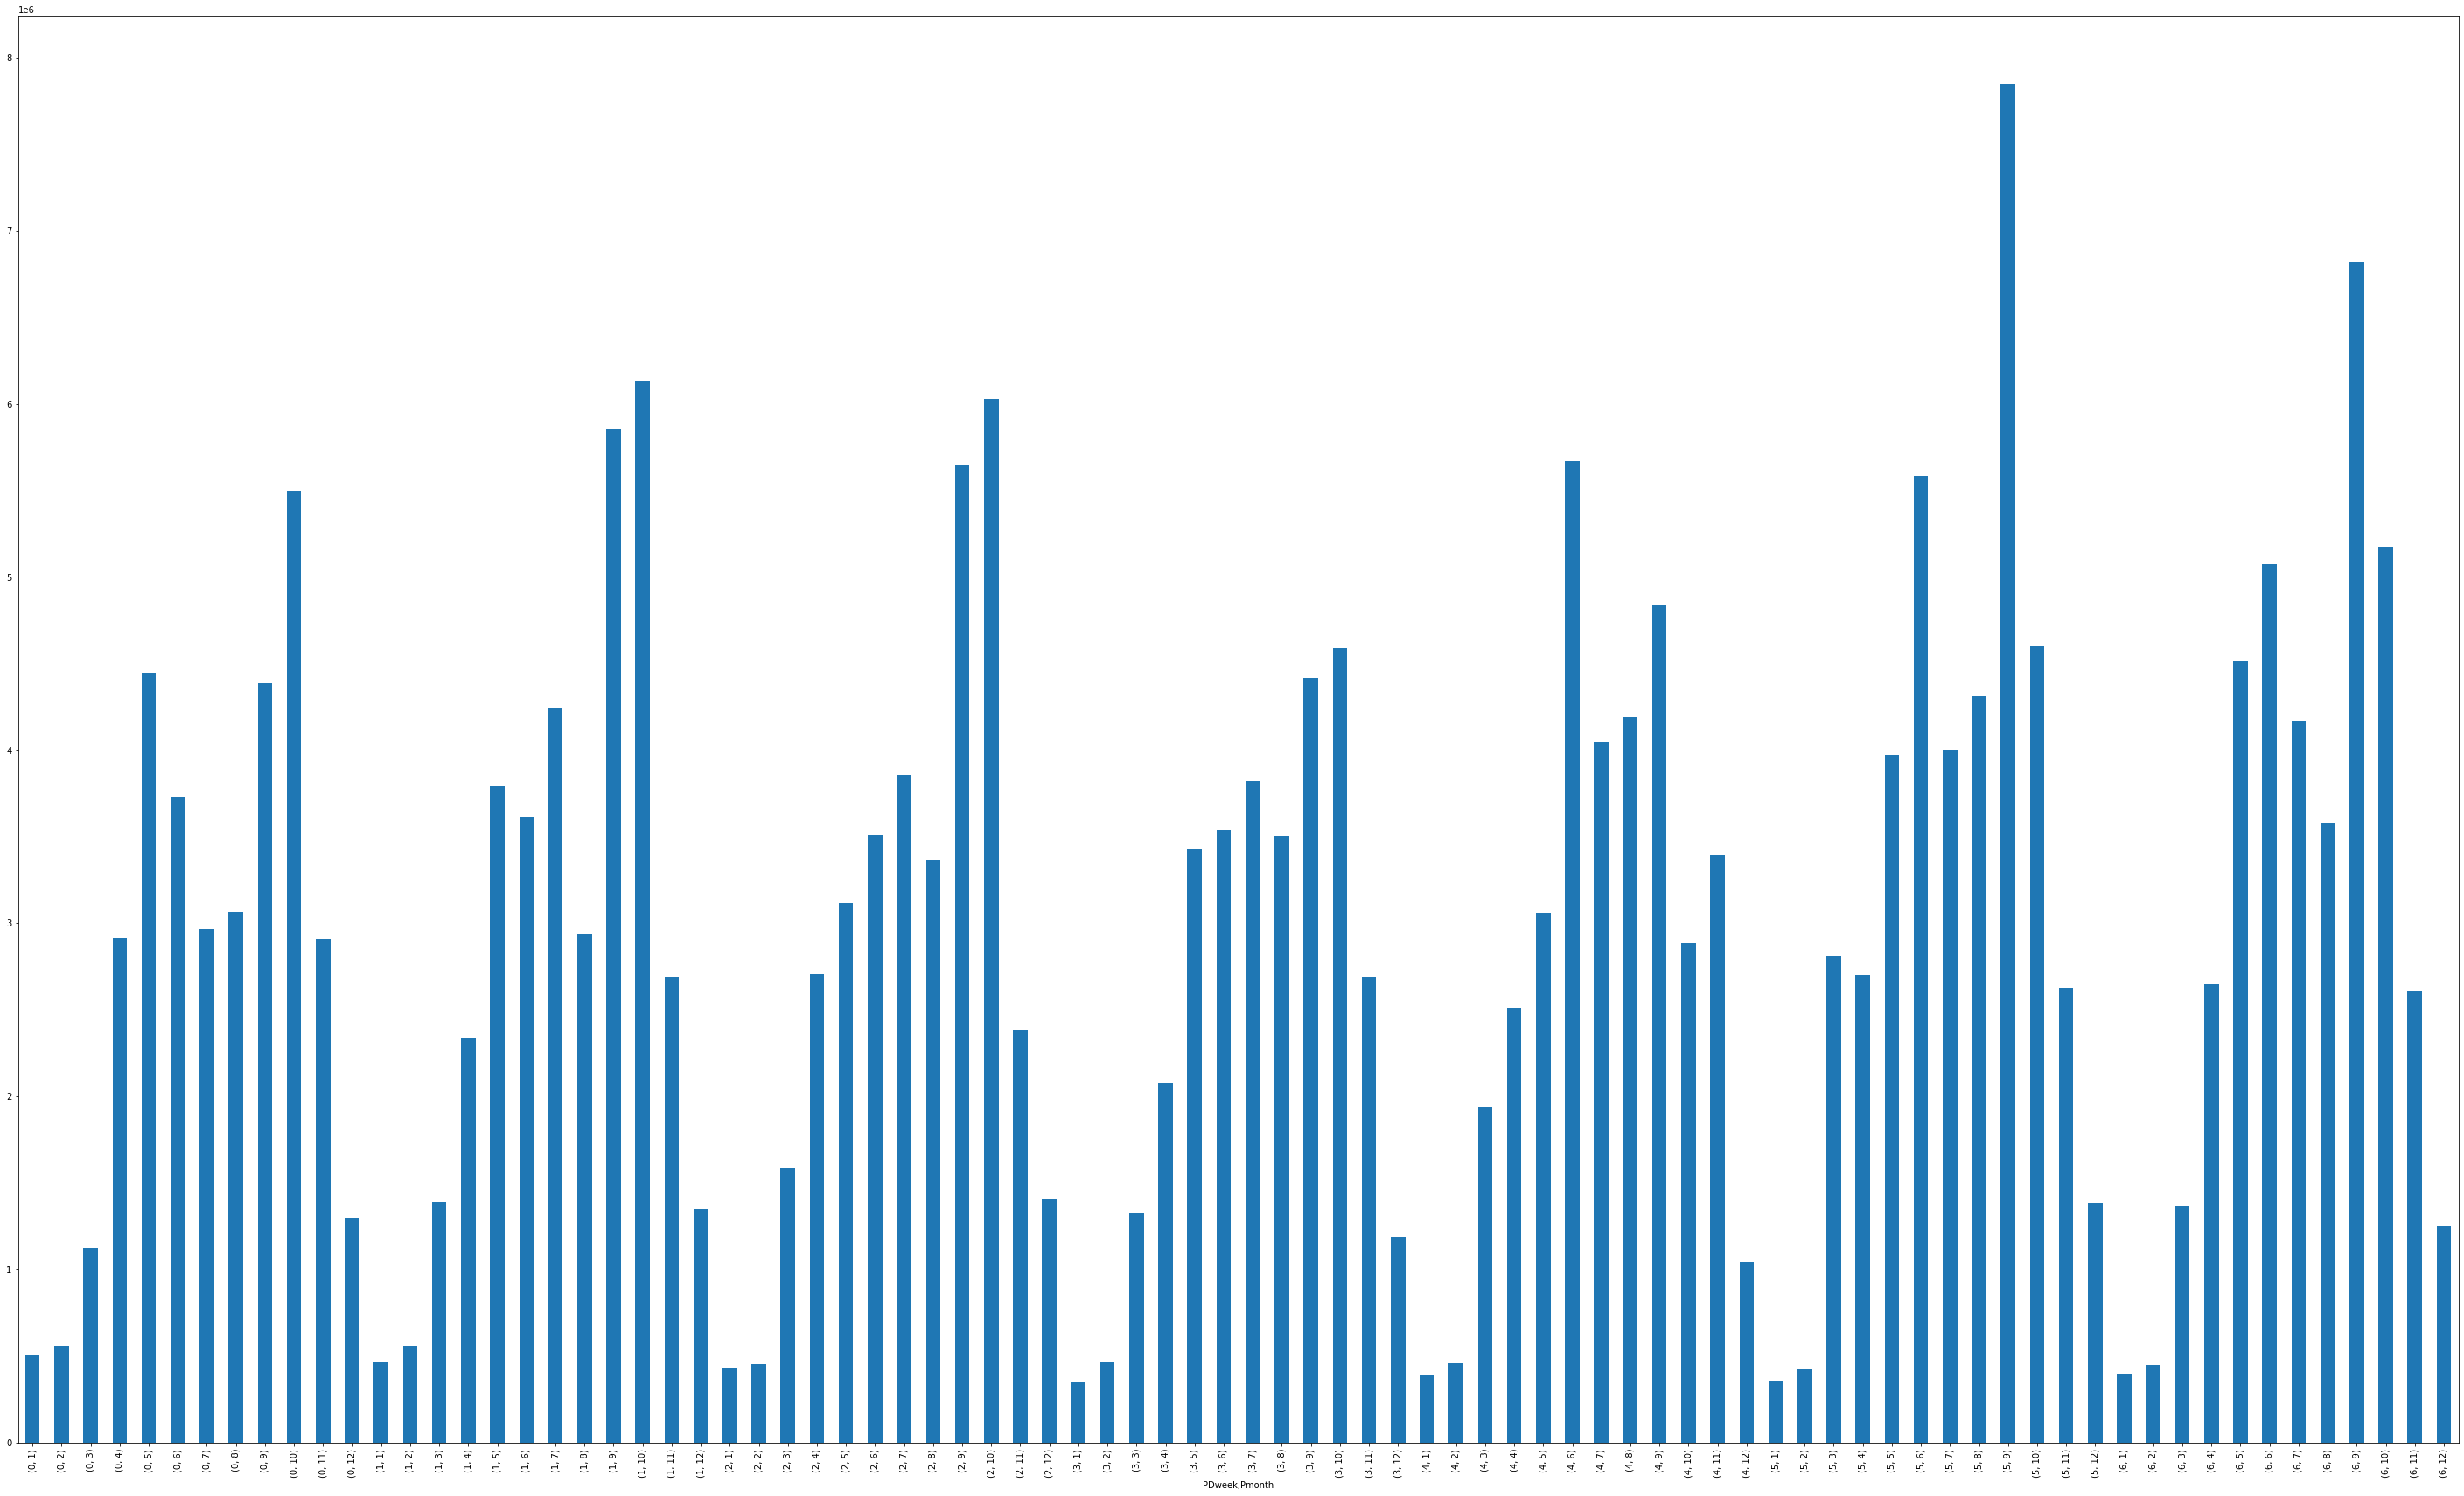

In [33]:
plt.figure(figsize = (50, 30))
ax = plt.axes()
ax.set_facecolor("white")
df.groupby(['PDweek', 'Pmonth'])['Duration'].sum().plot(kind = 'bar')
plt.show()

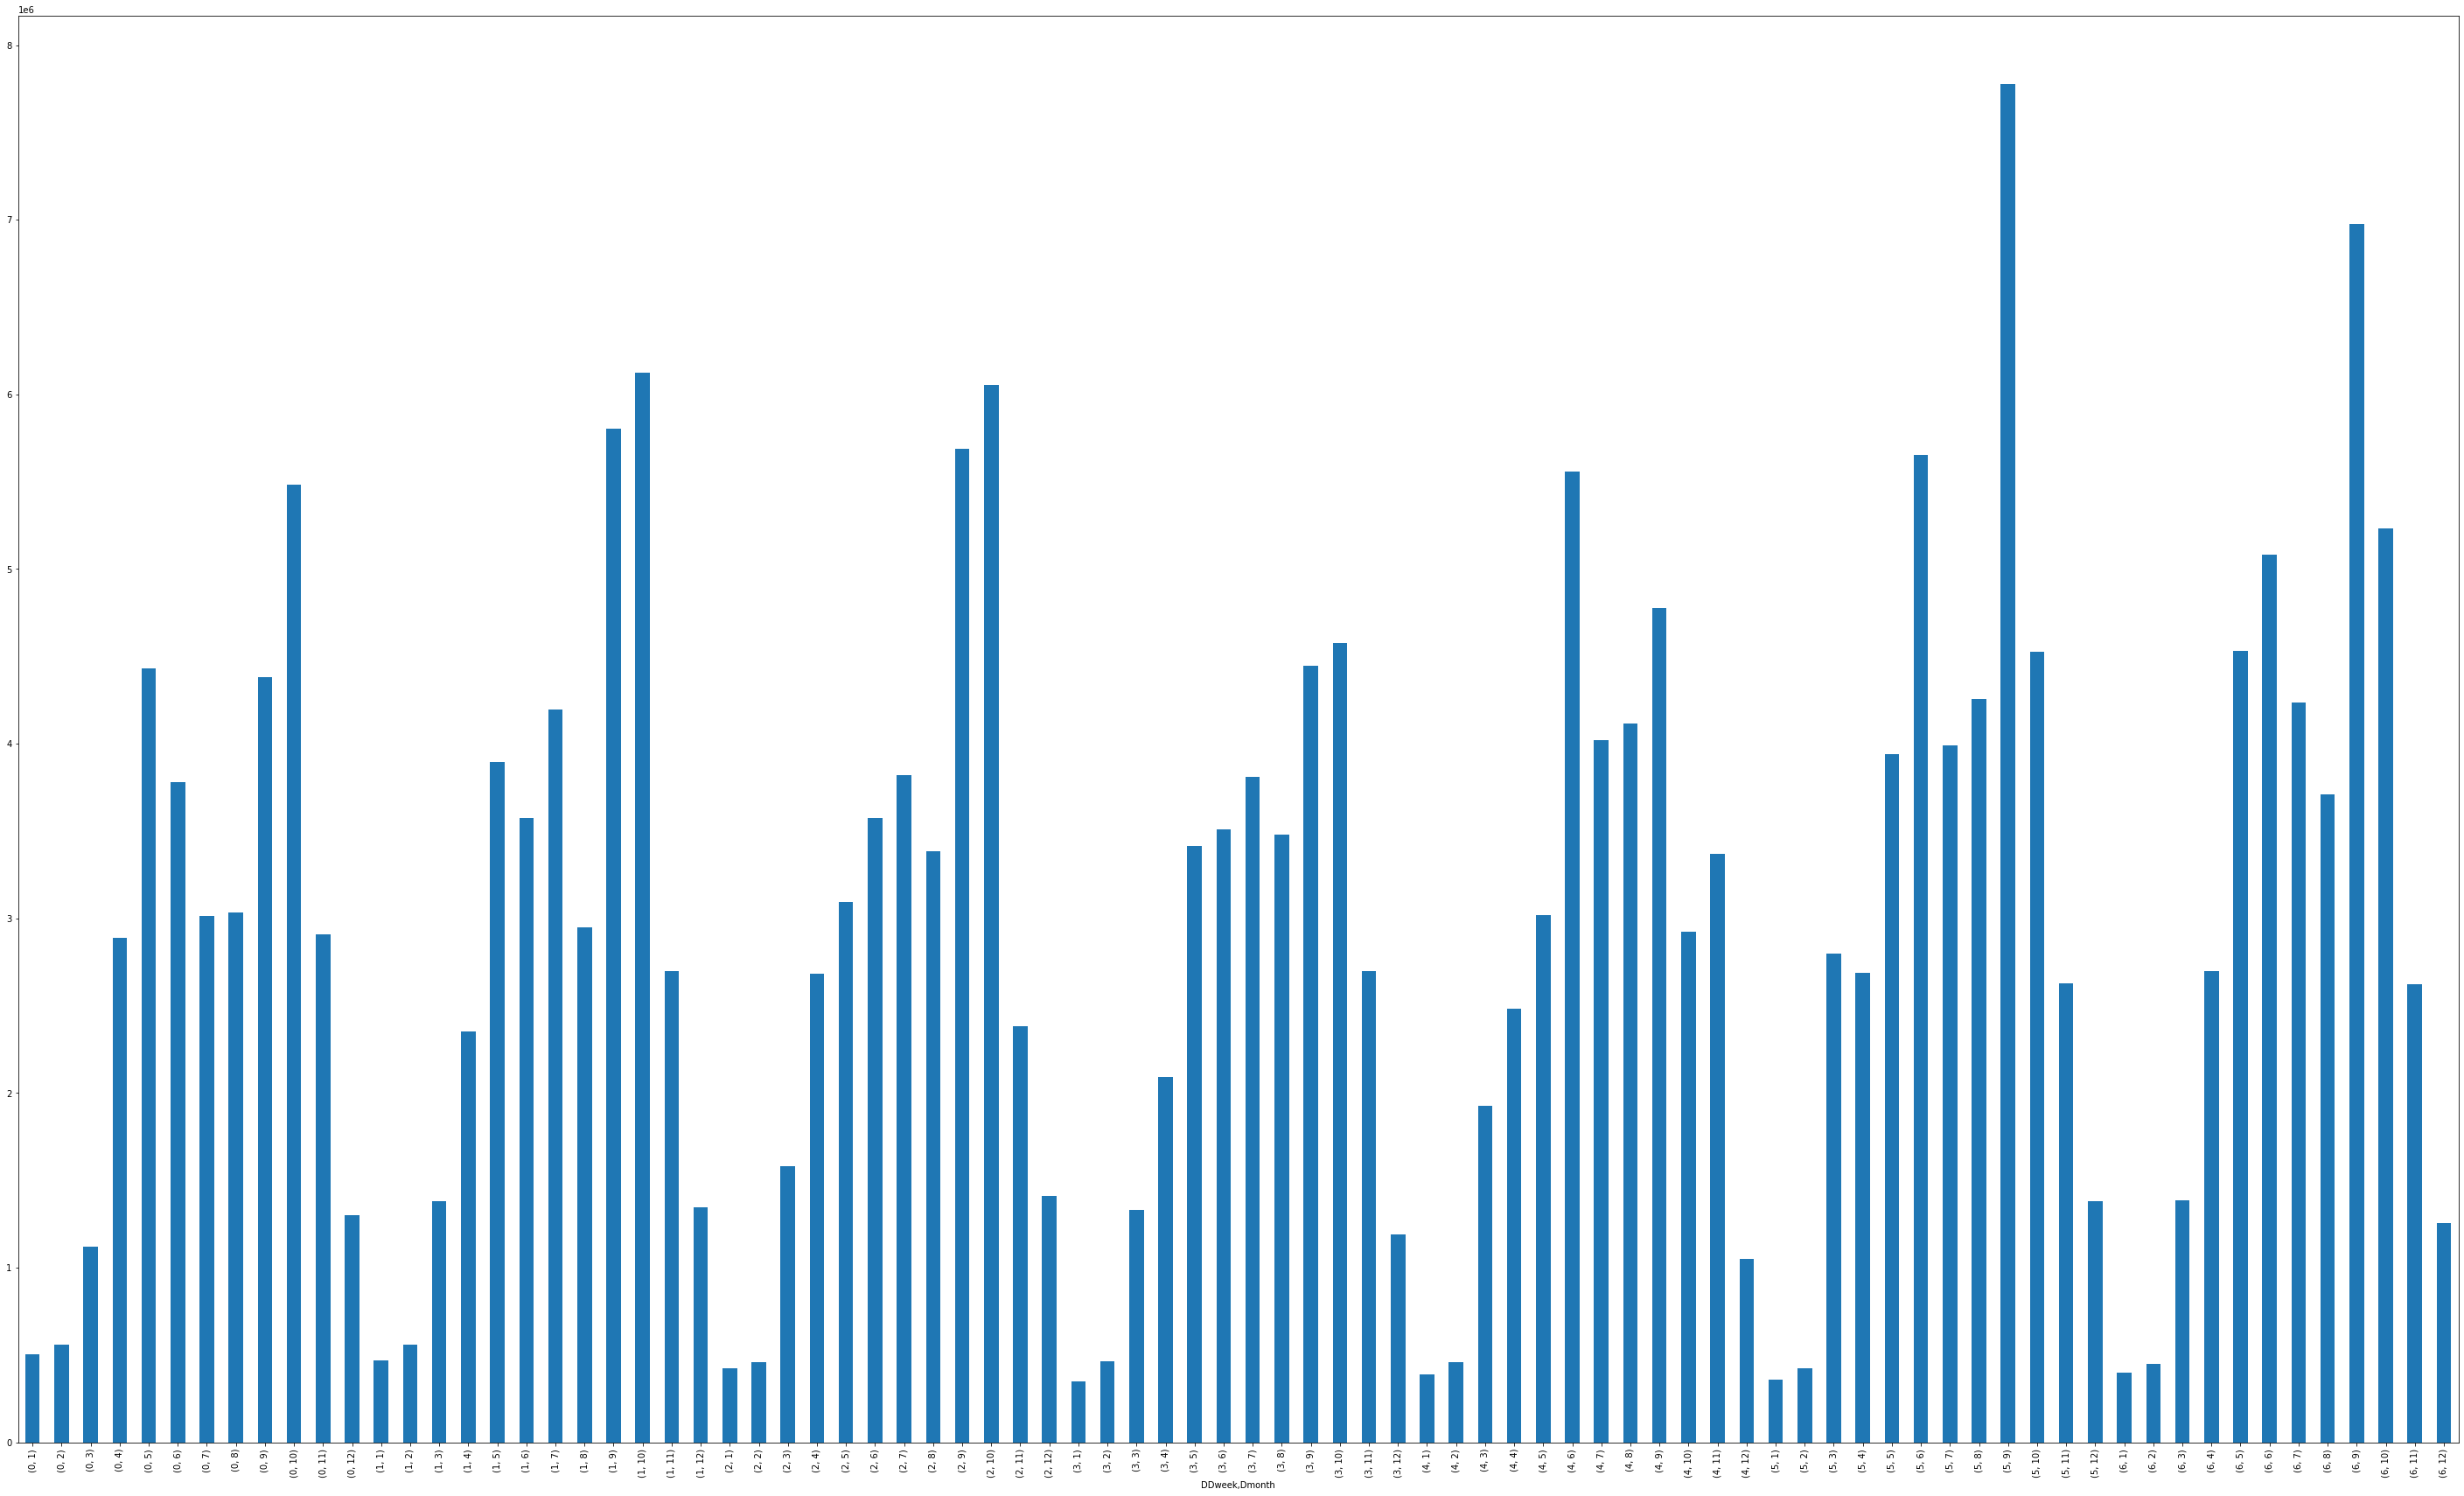

In [34]:
plt.figure(figsize = (50, 30))
ax = plt.axes()
ax.set_facecolor("white")
df.groupby(['DDweek', 'Dmonth'])['Duration'].sum().plot(kind = 'bar')
plt.show()

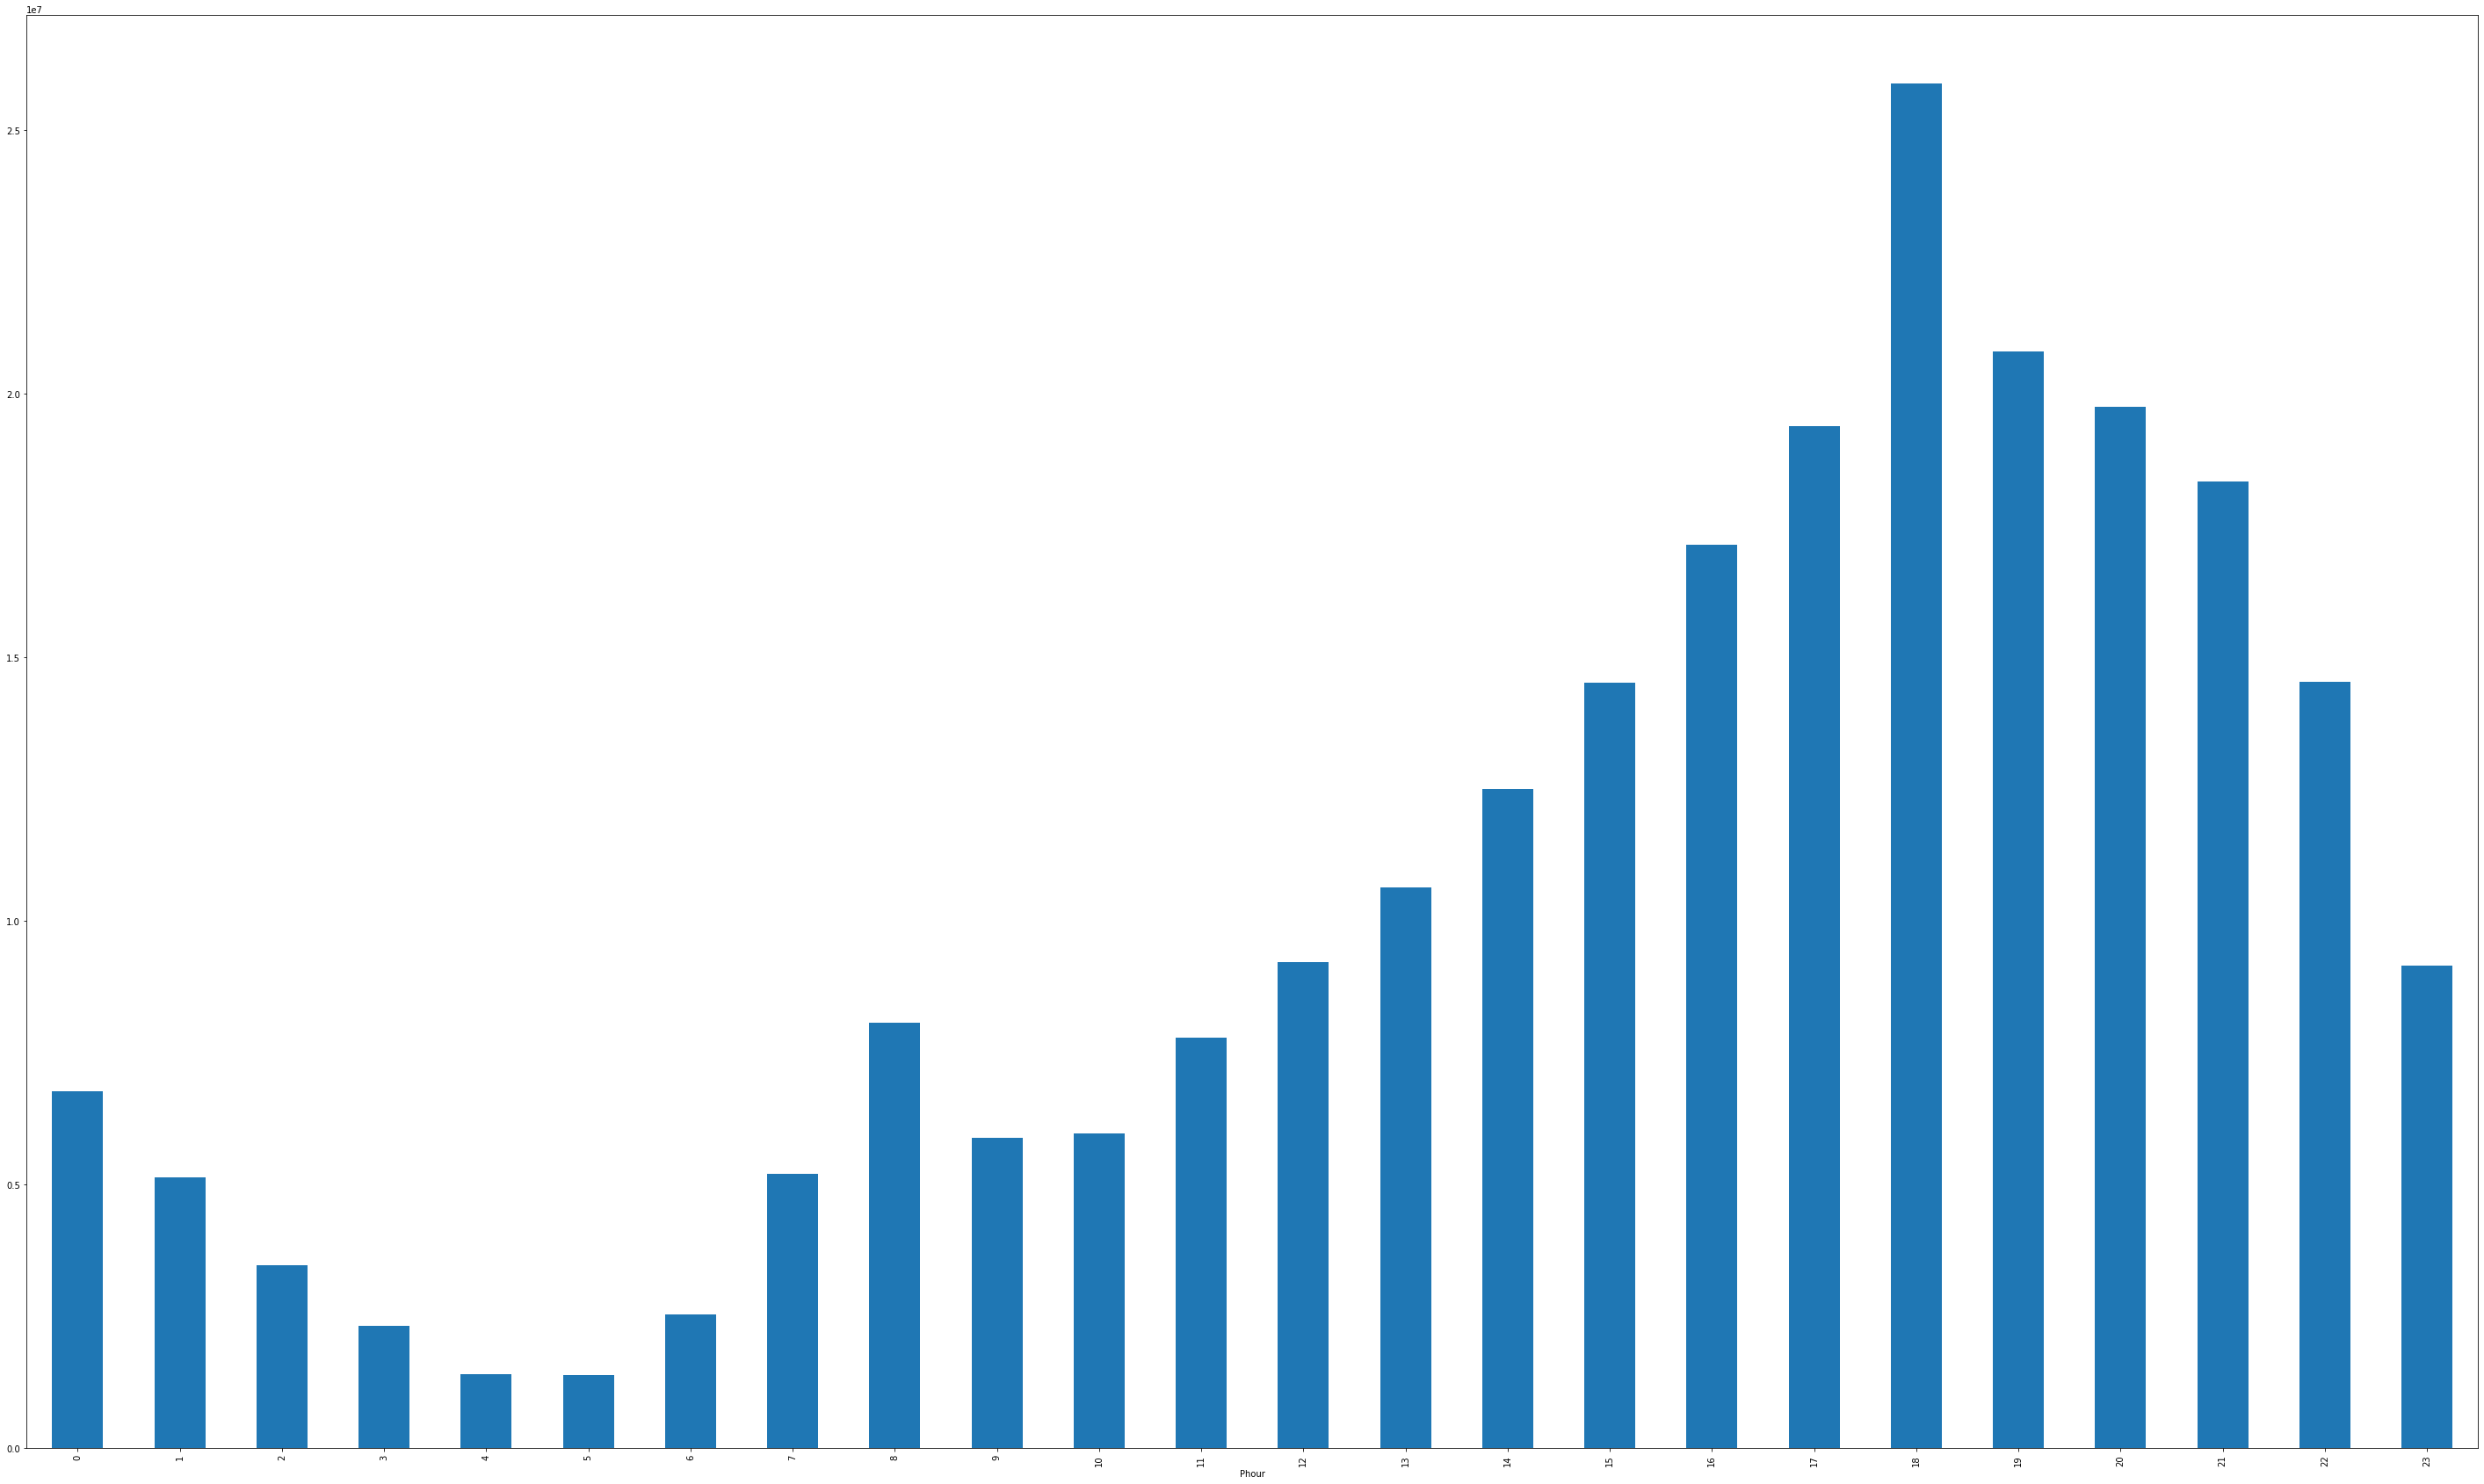

In [35]:
plt.figure(figsize = (50, 30))
ax = plt.axes()
ax.set_facecolor("white")
df.groupby(['Phour'])['Duration'].sum().plot(kind = 'bar')
plt.show()

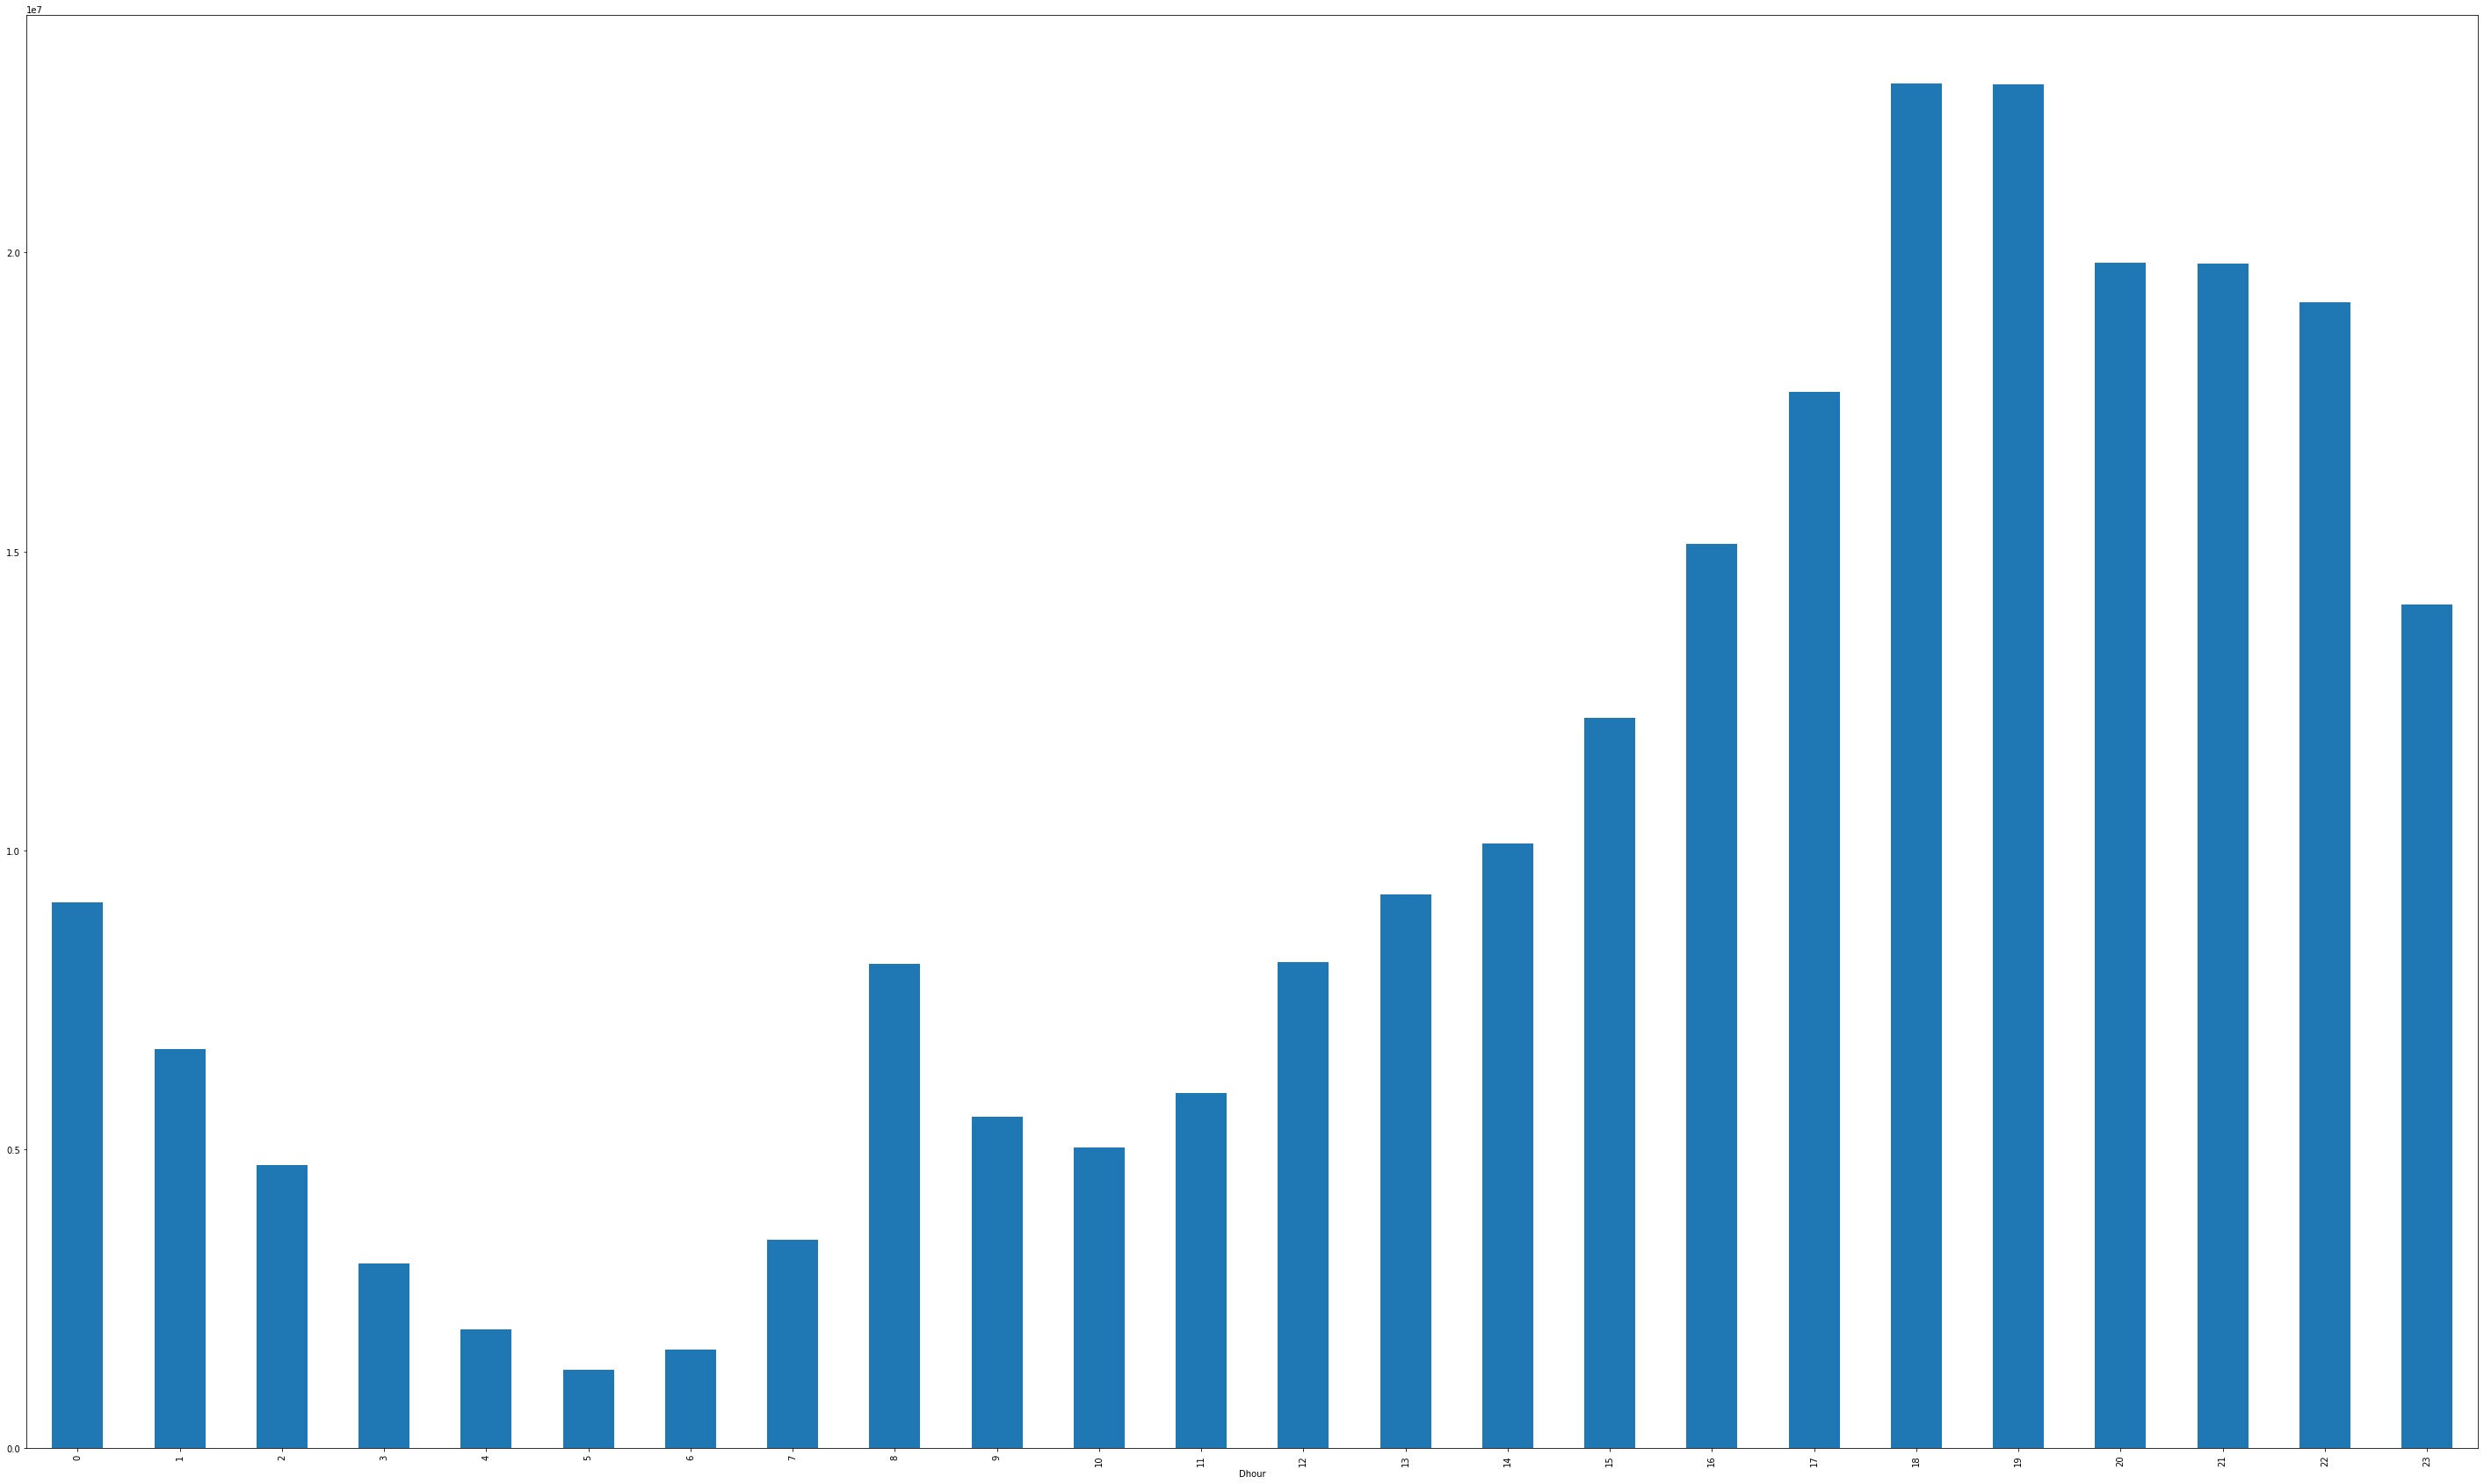

In [36]:
plt.figure(figsize = (50, 30))
ax = plt.axes()
ax.set_facecolor("white")
df.groupby(['Dhour'])['Duration'].sum().plot(kind = 'bar')
plt.show()

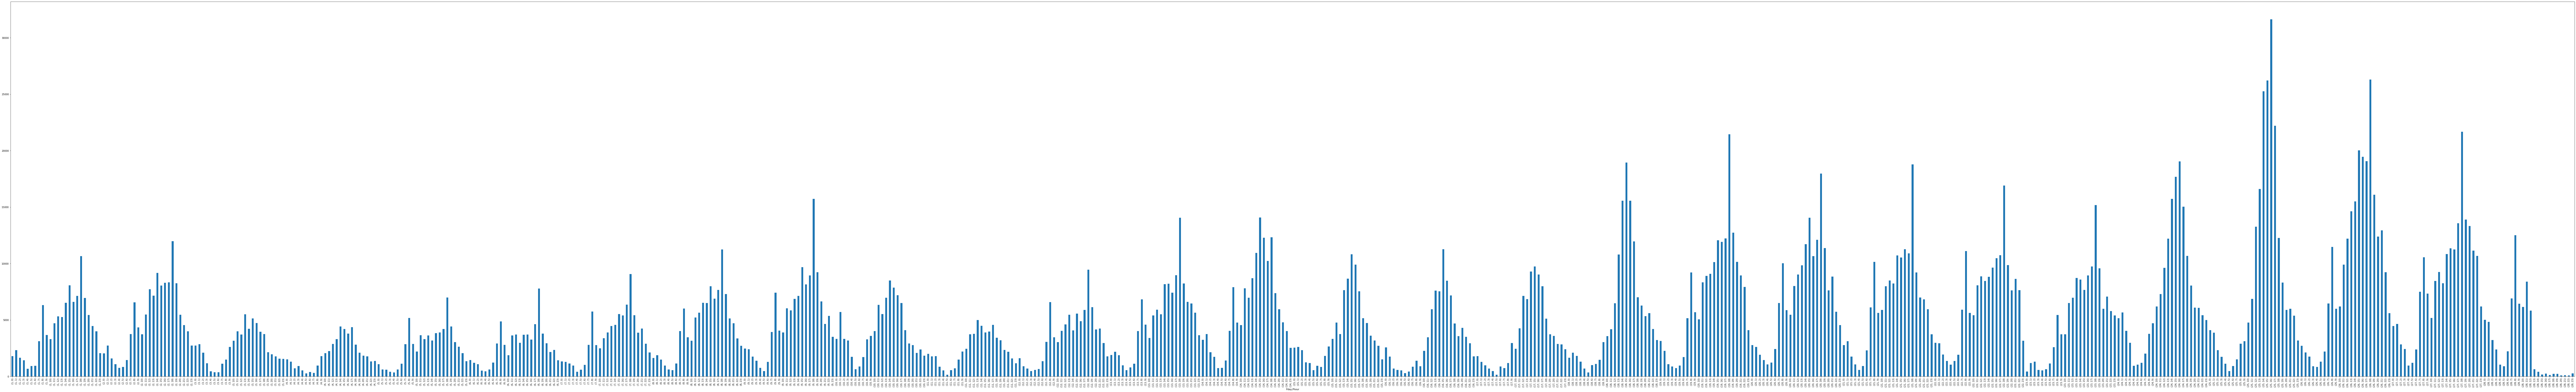

In [37]:
plt.figure(figsize = (200, 30))
ax = plt.axes()
ax.set_facecolor("white")
df[df['Pmonth'] == 2].groupby(['Pday', 'Phour'])['Duration'].sum().plot(kind = 'bar')
plt.show()

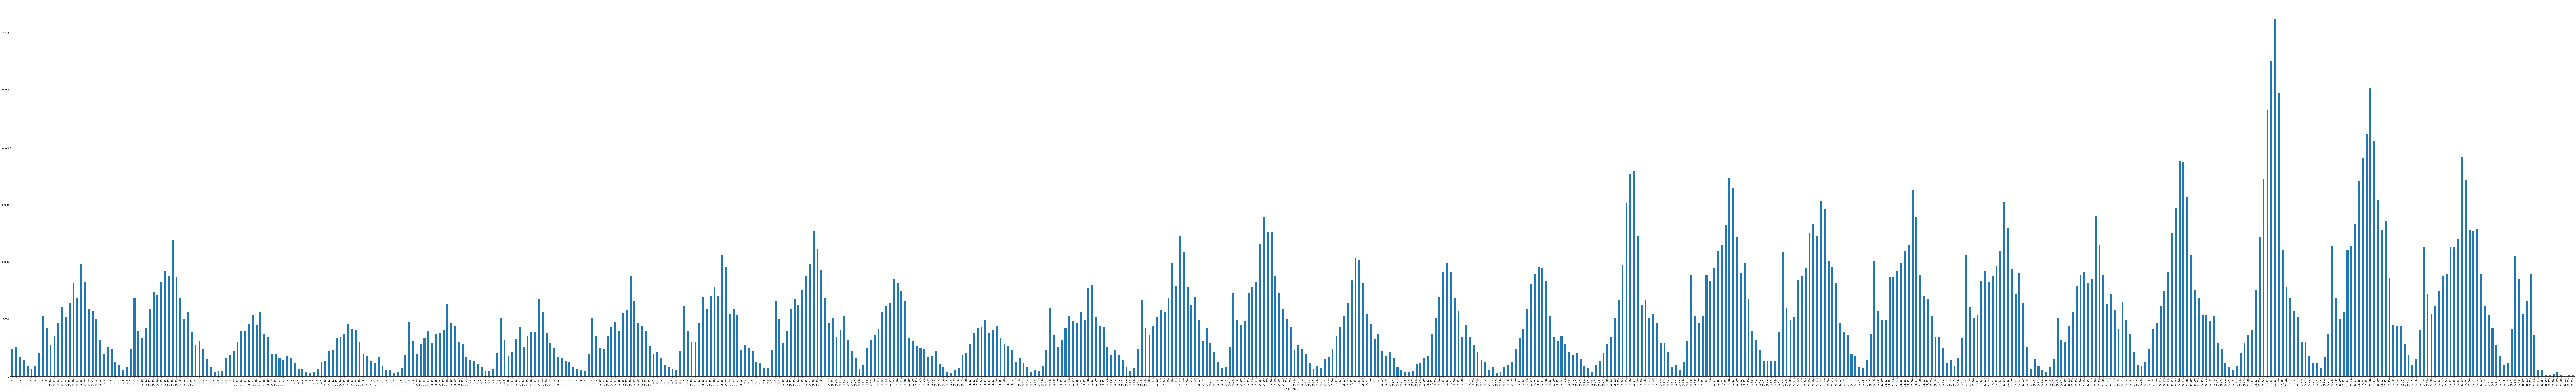

In [38]:
plt.figure(figsize = (200, 30))
ax = plt.axes()
ax.set_facecolor("white")
df[df['Dmonth'] == 2].groupby(['Dday', 'Dhour'])['Duration'].sum().plot(kind = 'bar')
plt.show()

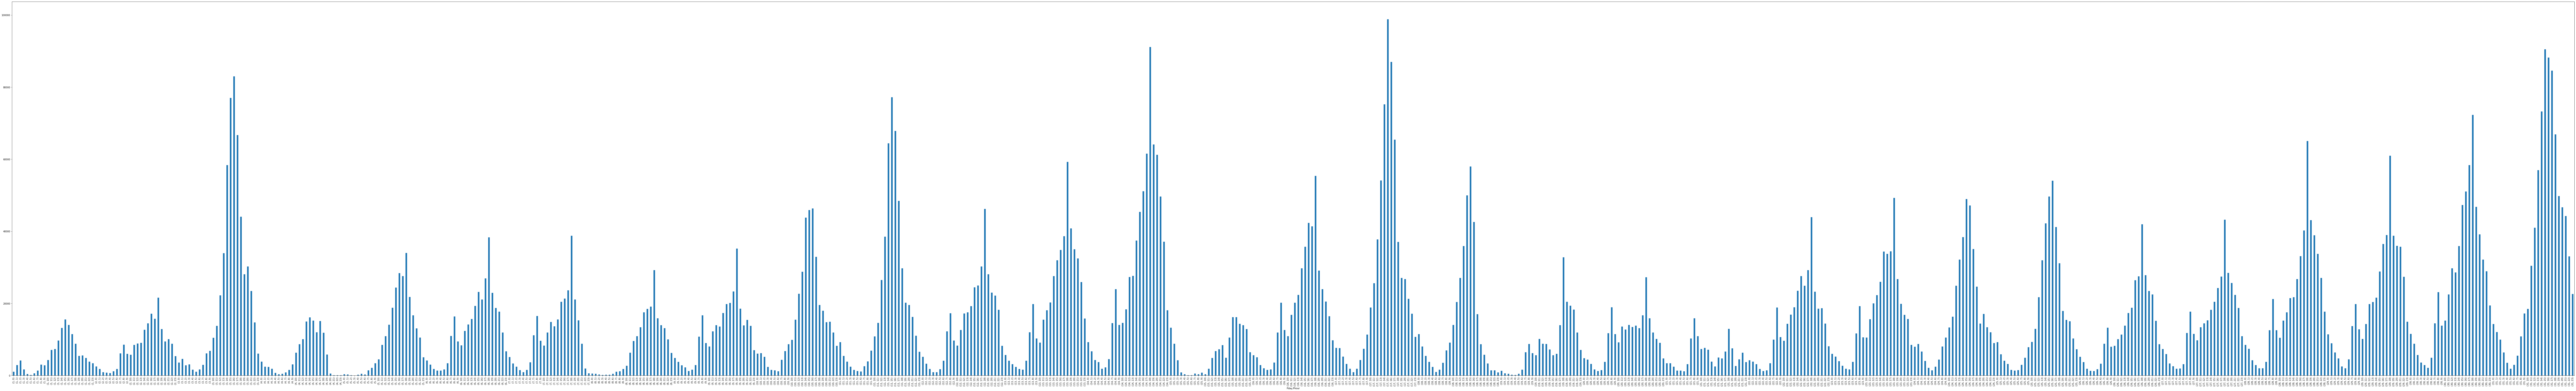

In [39]:
plt.figure(figsize = (200, 30))
ax = plt.axes()
ax.set_facecolor("white")
df[df['Pmonth'] == 3].groupby(['Pday', 'Phour'])['Duration'].sum().plot(kind = 'bar')
plt.show()

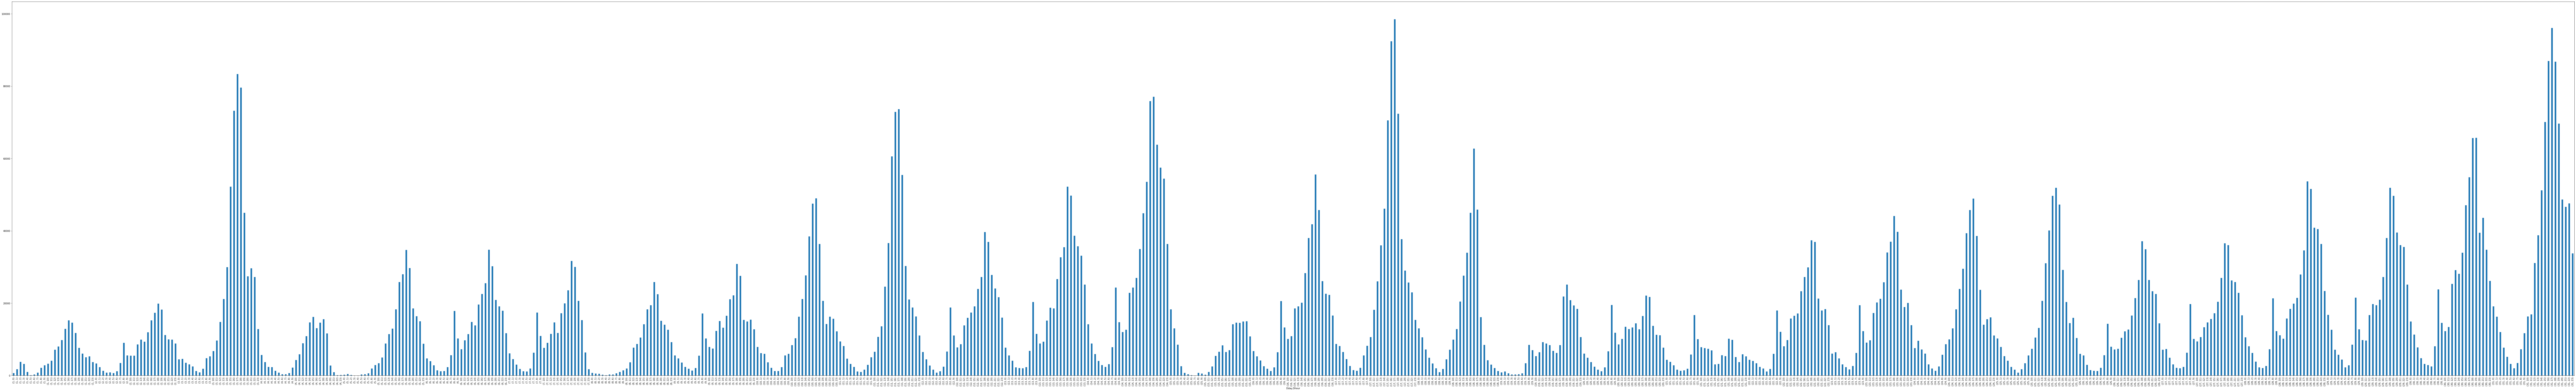

In [40]:
plt.figure(figsize = (200, 30))
ax = plt.axes()
ax.set_facecolor("white")
df[df['Dmonth'] == 3].groupby(['Dday', 'Dhour'])['Duration'].sum().plot(kind = 'bar')
plt.show()

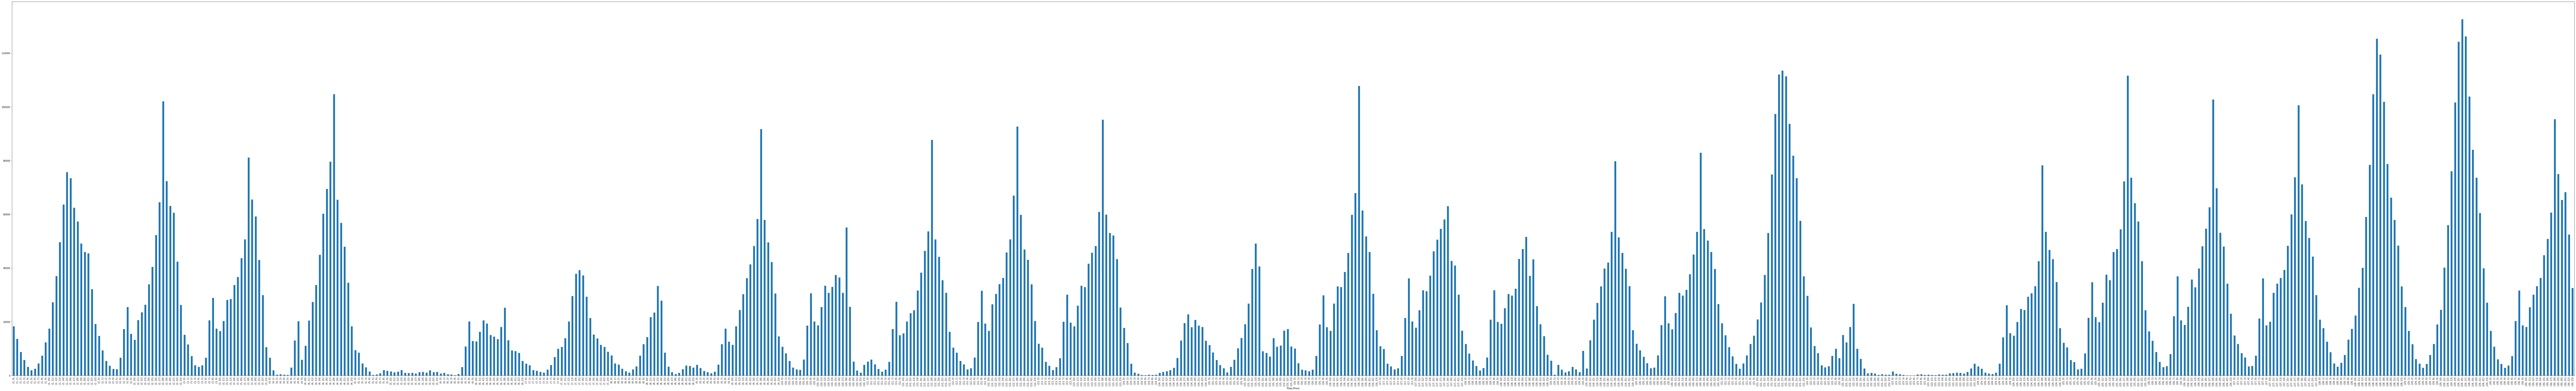

In [41]:
plt.figure(figsize = (200, 30))
ax = plt.axes()
ax.set_facecolor("white")
df[df['Pmonth'] == 4].groupby(['Pday', 'Phour'])['Duration'].sum().plot(kind = 'bar')
plt.show()

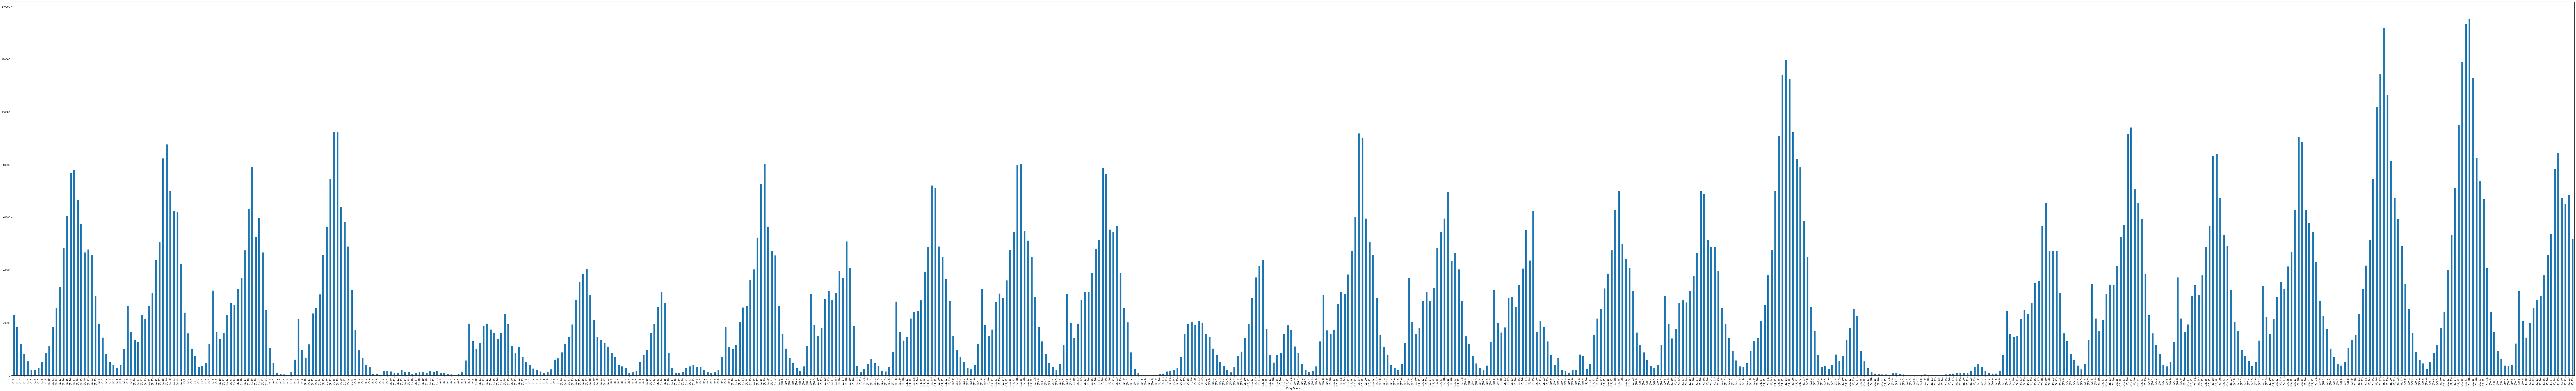

In [42]:
plt.figure(figsize = (200, 30))
ax = plt.axes()
ax.set_facecolor("white")
df[df['Dmonth'] == 4].groupby(['Dday', 'Dhour'])['Duration'].sum().plot(kind = 'bar')
plt.show()

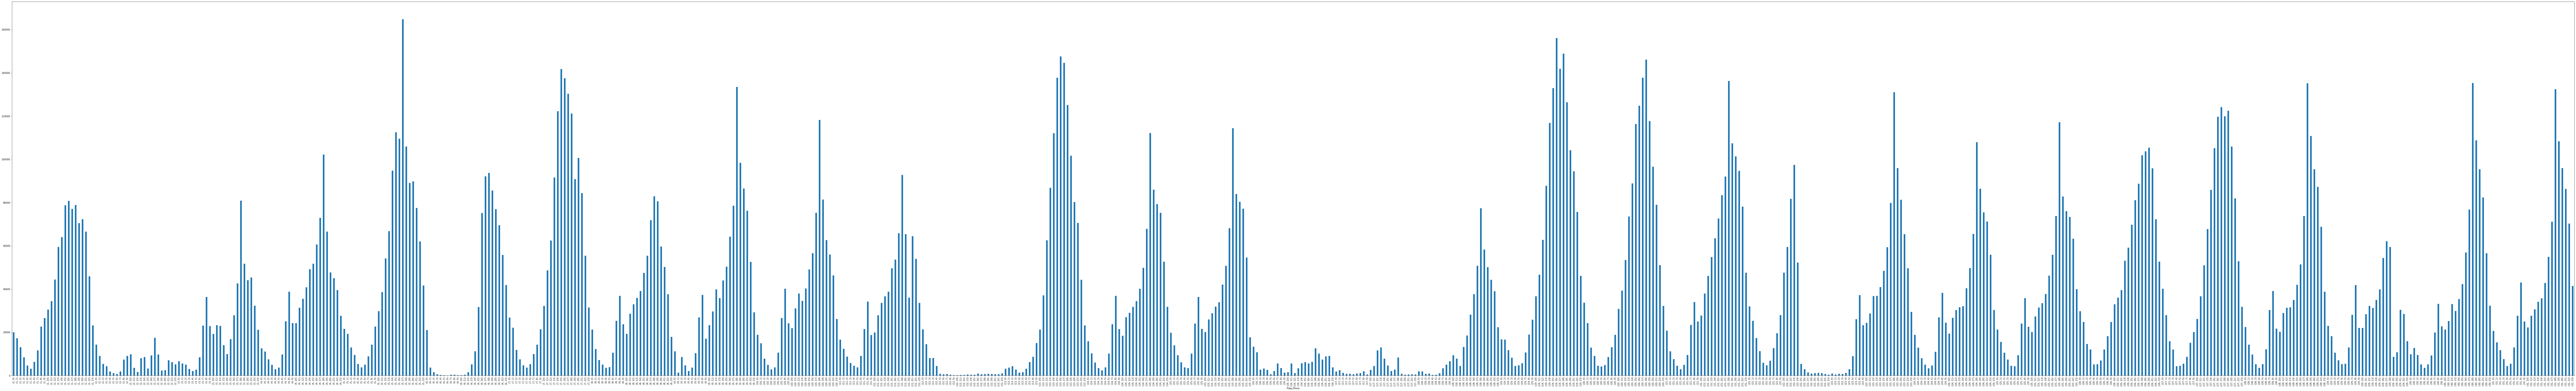

In [43]:
plt.figure(figsize = (200, 30))
ax = plt.axes()
ax.set_facecolor("white")
df[df['Pmonth'] == 5].groupby(['Pday', 'Phour'])['Duration'].sum().plot(kind = 'bar')
plt.show()

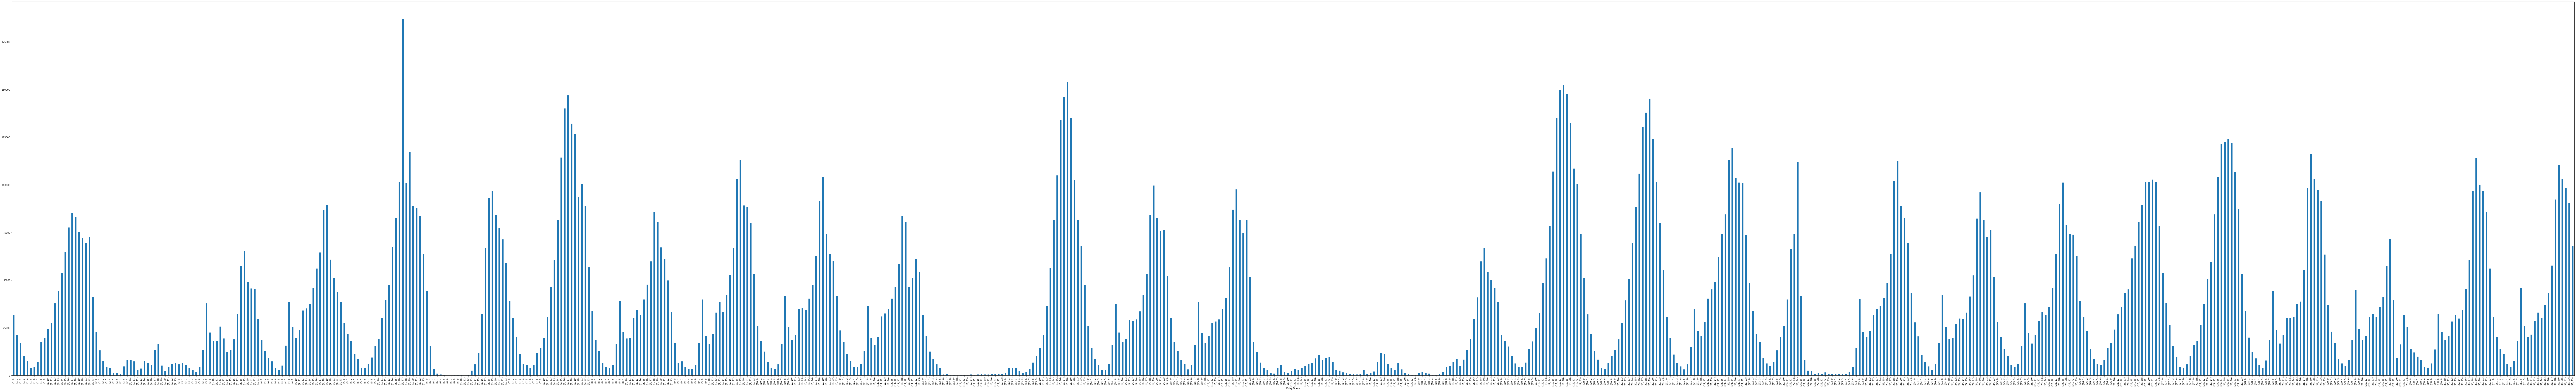

In [44]:
plt.figure(figsize = (200, 30))
ax = plt.axes()
ax.set_facecolor("white")
df[df['Dmonth'] == 5].groupby(['Dday', 'Dhour'])['Duration'].sum().plot(kind = 'bar')
plt.show()

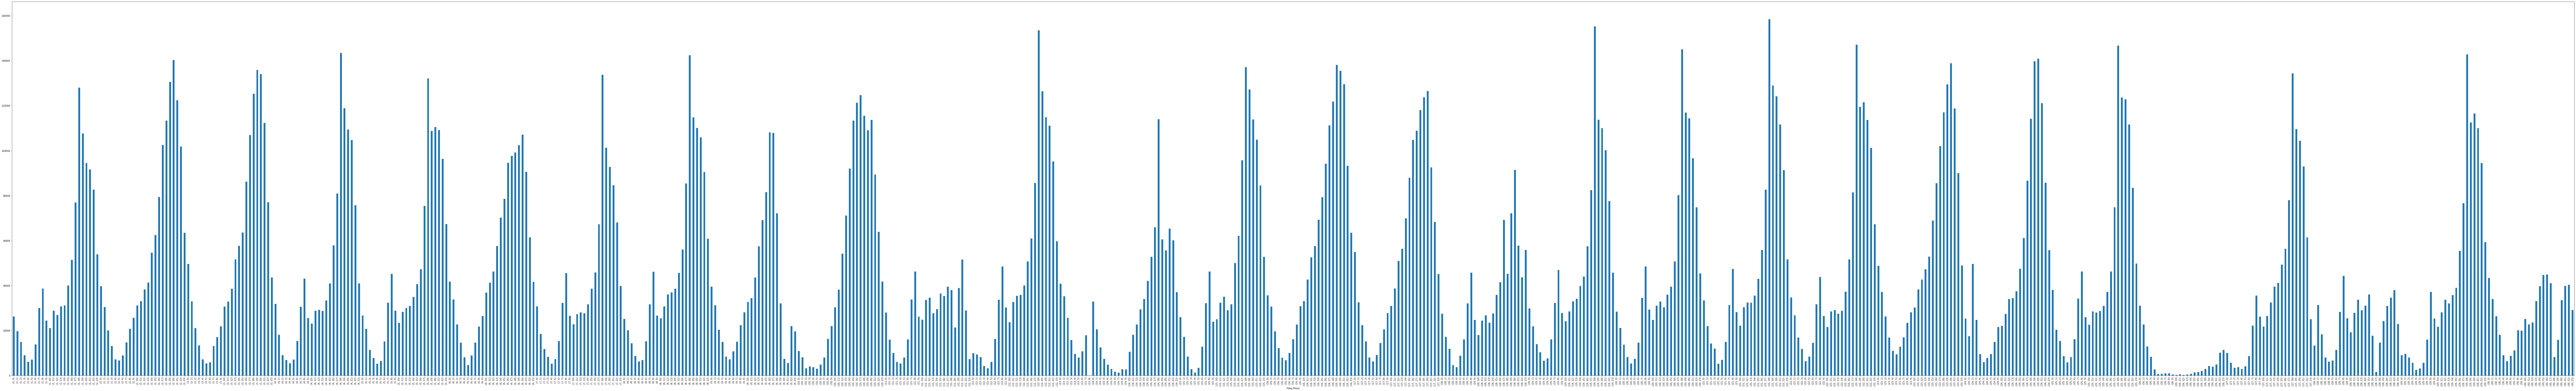

In [45]:
plt.figure(figsize = (200, 30))
ax = plt.axes()
ax.set_facecolor("white")
df[df['Pmonth'] == 6].groupby(['Pday', 'Phour'])['Duration'].sum().plot(kind = 'bar')
plt.show()

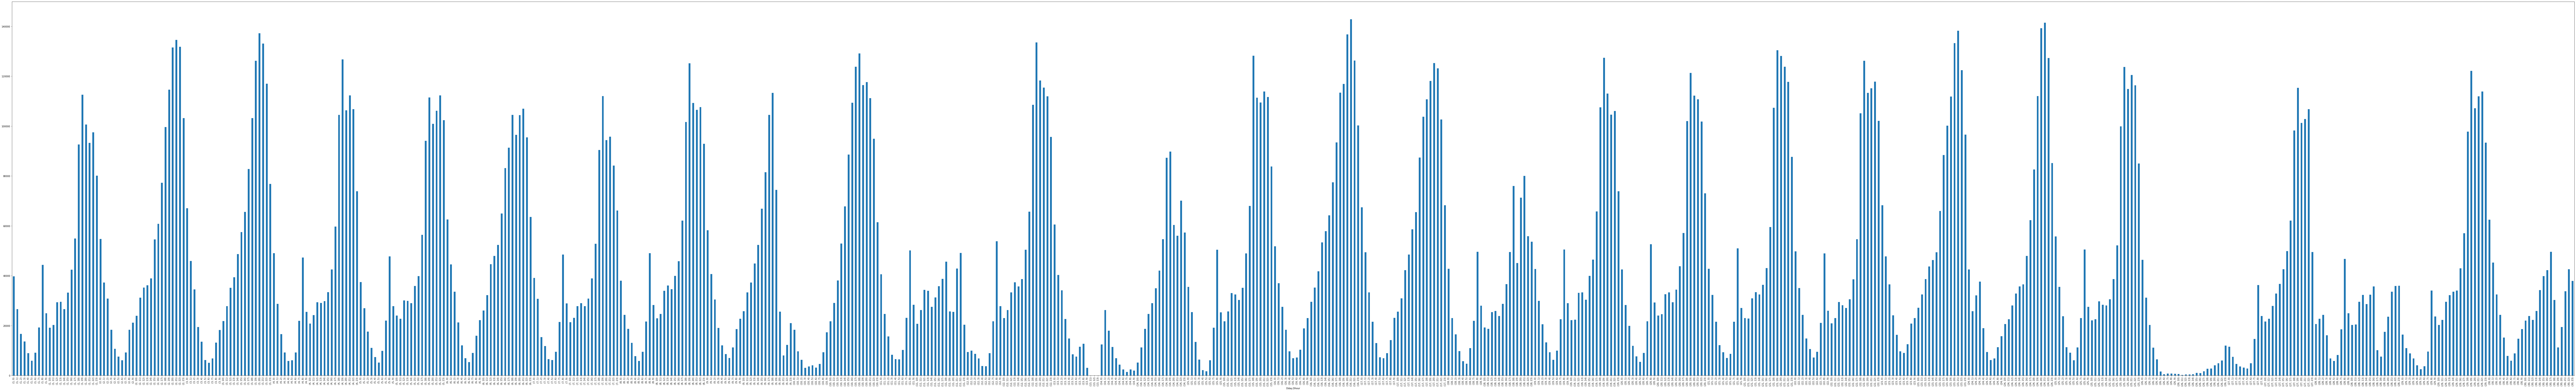

In [46]:
plt.figure(figsize = (200, 30))
ax = plt.axes()
ax.set_facecolor("white")
df[df['Dmonth'] == 6].groupby(['Dday', 'Dhour'])['Duration'].sum().plot(kind = 'bar')
plt.show()

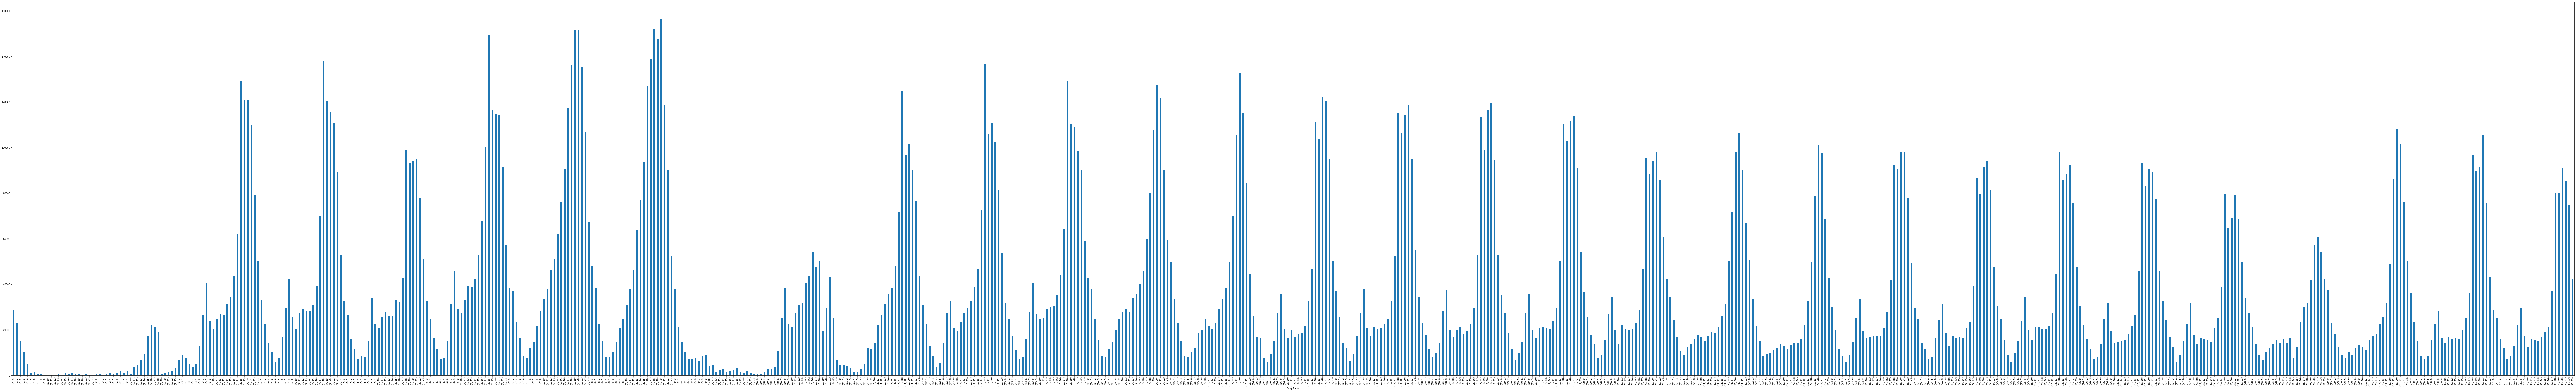

In [47]:
plt.figure(figsize = (200, 30))
ax = plt.axes()
ax.set_facecolor("white")
df[df['Pmonth'] == 7].groupby(['Pday', 'Phour'])['Duration'].sum().plot(kind = 'bar')
plt.show()

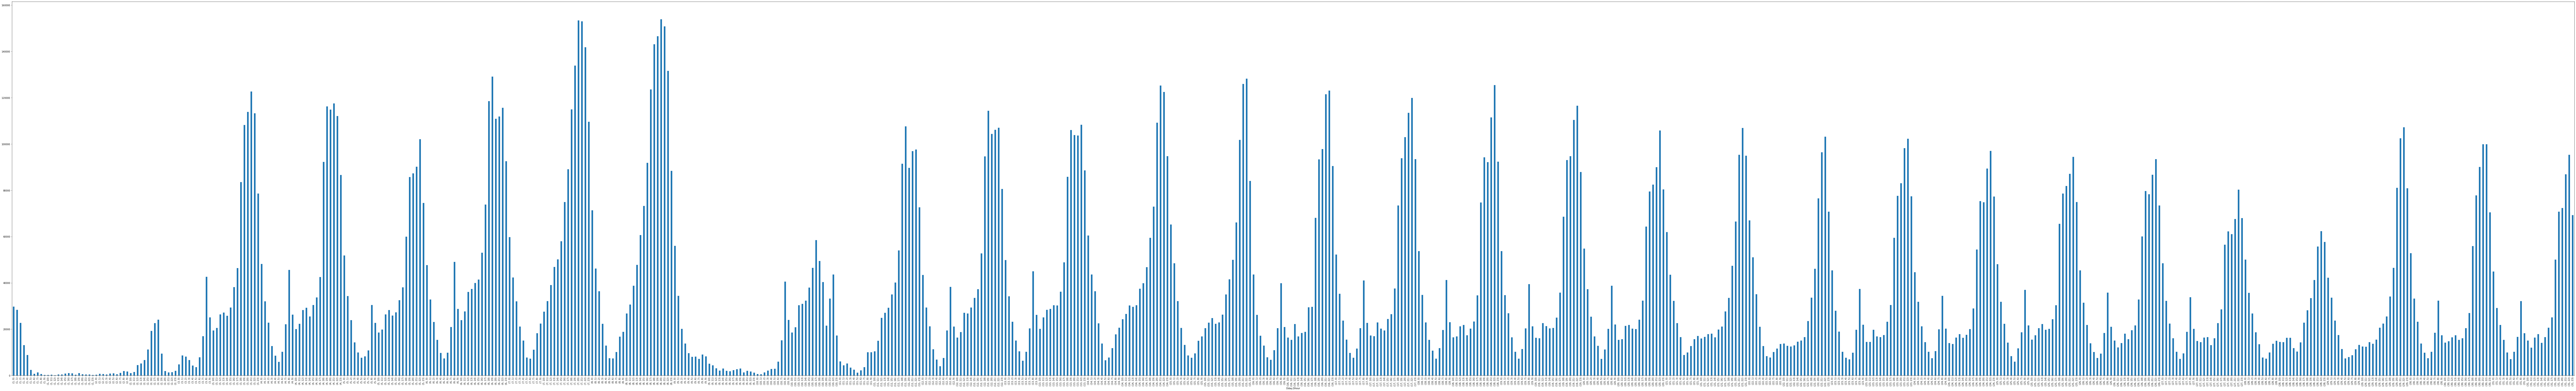

In [48]:
plt.figure(figsize = (200, 30))
ax = plt.axes()
ax.set_facecolor("white")
df[df['Dmonth'] == 7].groupby(['Dday', 'Dhour'])['Duration'].sum().plot(kind = 'bar')
plt.show()

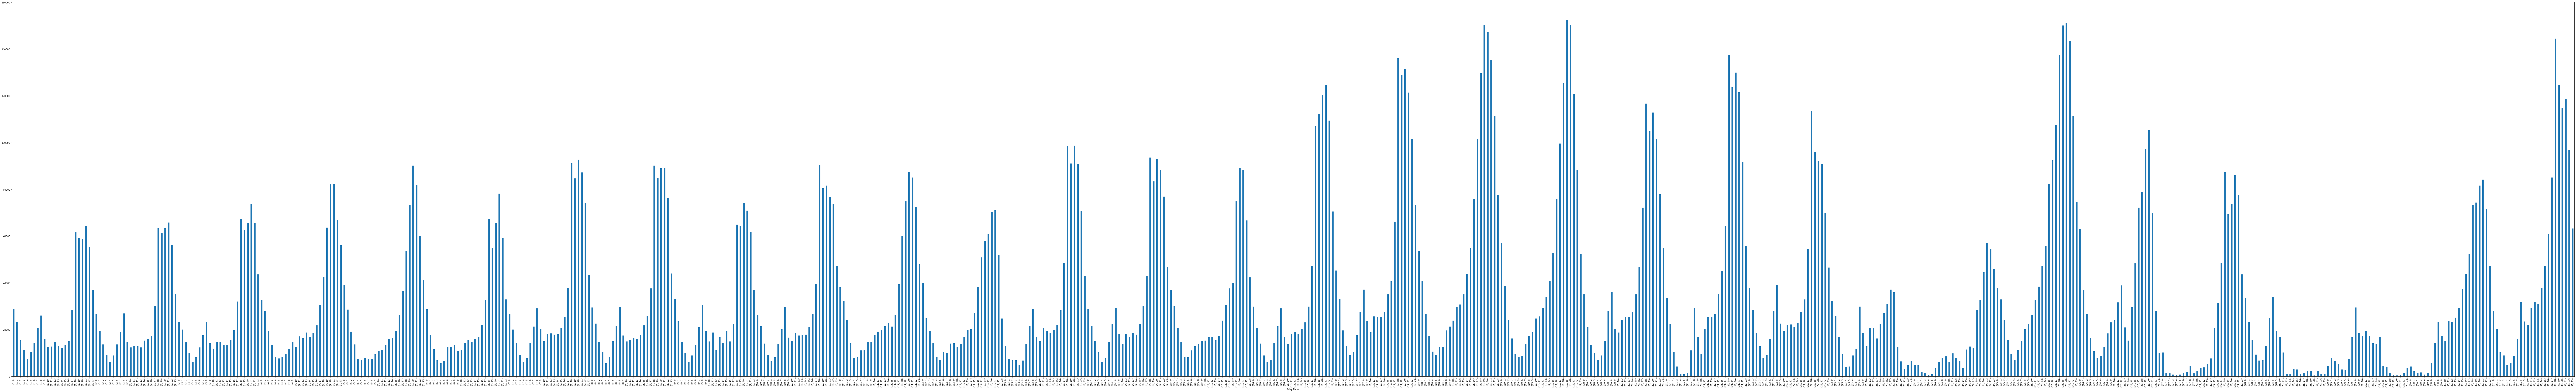

In [49]:
plt.figure(figsize = (200, 30))
ax = plt.axes()
ax.set_facecolor("white")
df[df['Pmonth'] == 8].groupby(['Pday', 'Phour'])['Duration'].sum().plot(kind = 'bar')
plt.show()

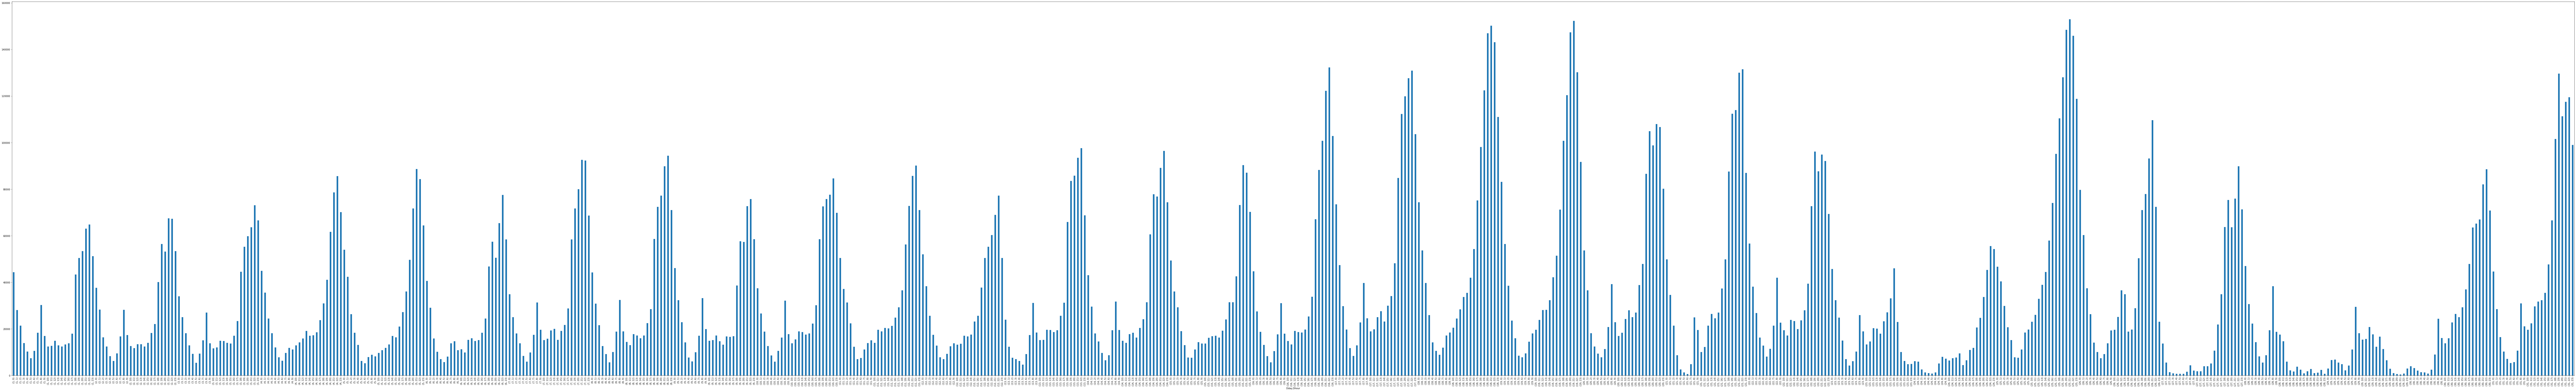

In [50]:
plt.figure(figsize = (200, 30))
ax = plt.axes()
ax.set_facecolor("white")
df[df['Dmonth'] == 8].groupby(['Dday', 'Dhour'])['Duration'].sum().plot(kind = 'bar')
plt.show()

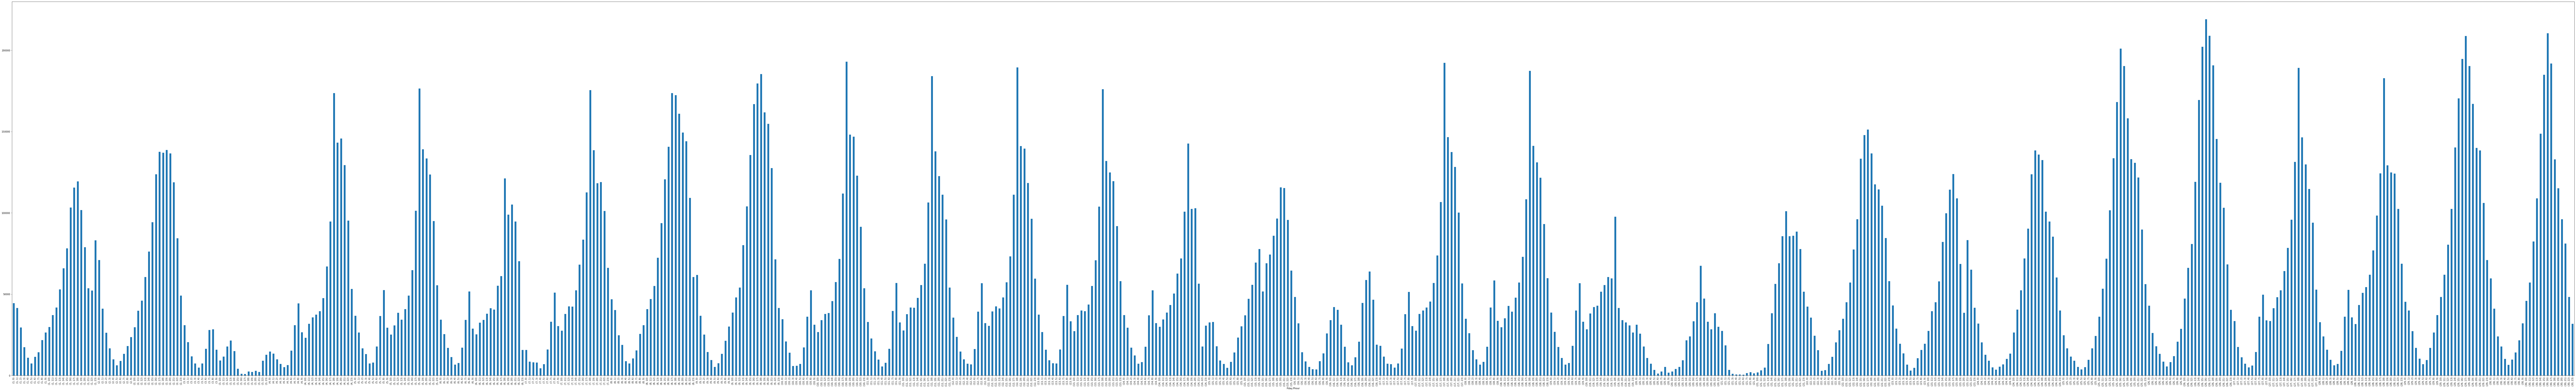

In [51]:
plt.figure(figsize = (200, 30))
ax = plt.axes()
ax.set_facecolor("white")
df[df['Pmonth'] == 9].groupby(['Pday', 'Phour'])['Duration'].sum().plot(kind = 'bar')
plt.show()

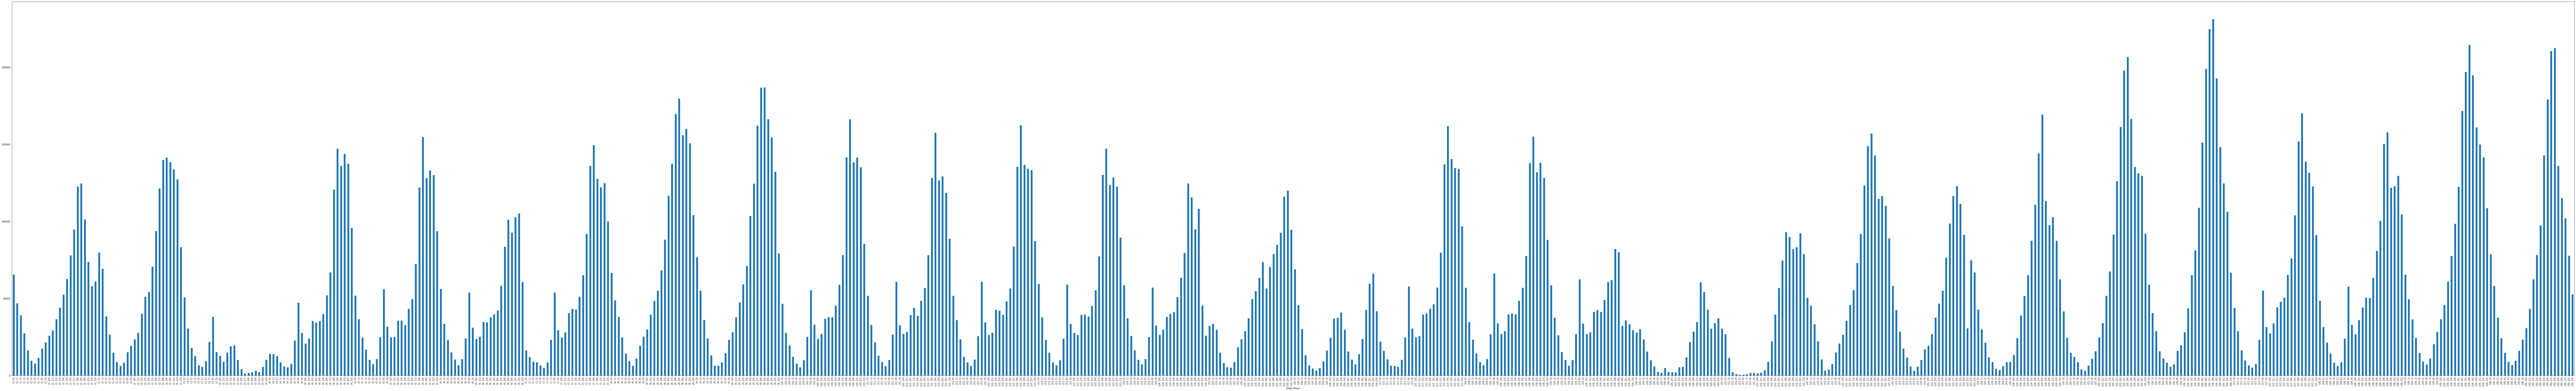

In [52]:
plt.figure(figsize = (200, 30))
ax = plt.axes()
ax.set_facecolor("white")
df[df['Dmonth'] == 9].groupby(['Dday', 'Dhour'])['Duration'].sum().plot(kind = 'bar')
plt.show()

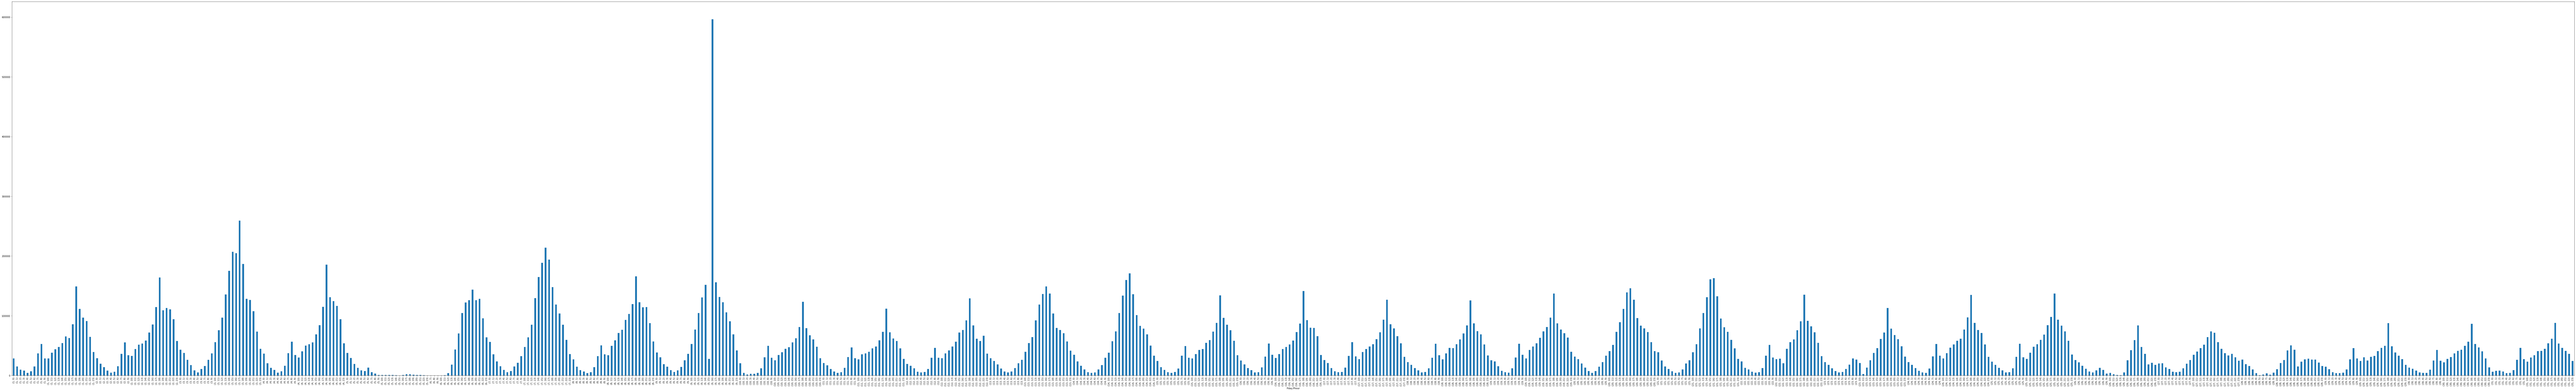

In [53]:
plt.figure(figsize = (200, 30))
ax = plt.axes()
ax.set_facecolor("white")
df[df['Pmonth'] == 10].groupby(['Pday', 'Phour'])['Duration'].sum().plot(kind = 'bar')
plt.show()

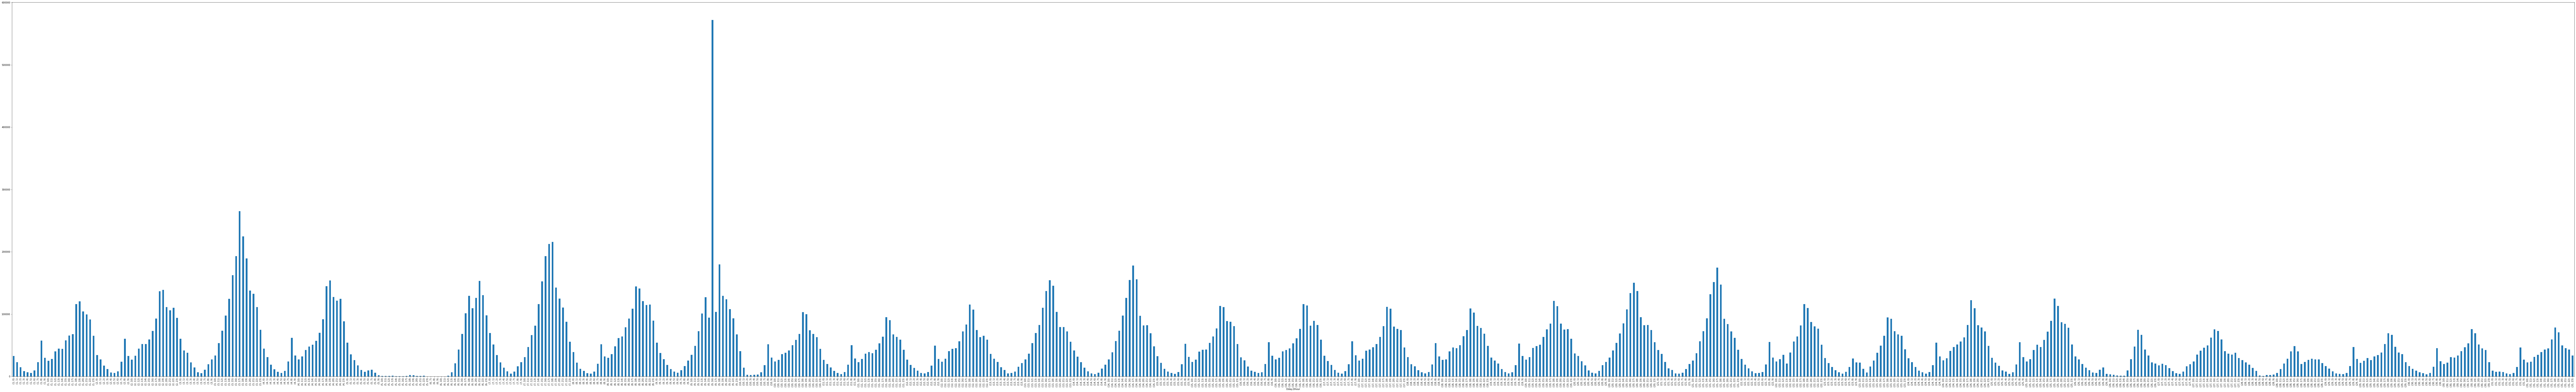

In [54]:
plt.figure(figsize = (200, 30))
ax = plt.axes()
ax.set_facecolor("white")
df[df['Dmonth'] == 10].groupby(['Dday', 'Dhour'])['Duration'].sum().plot(kind = 'bar')
plt.show()

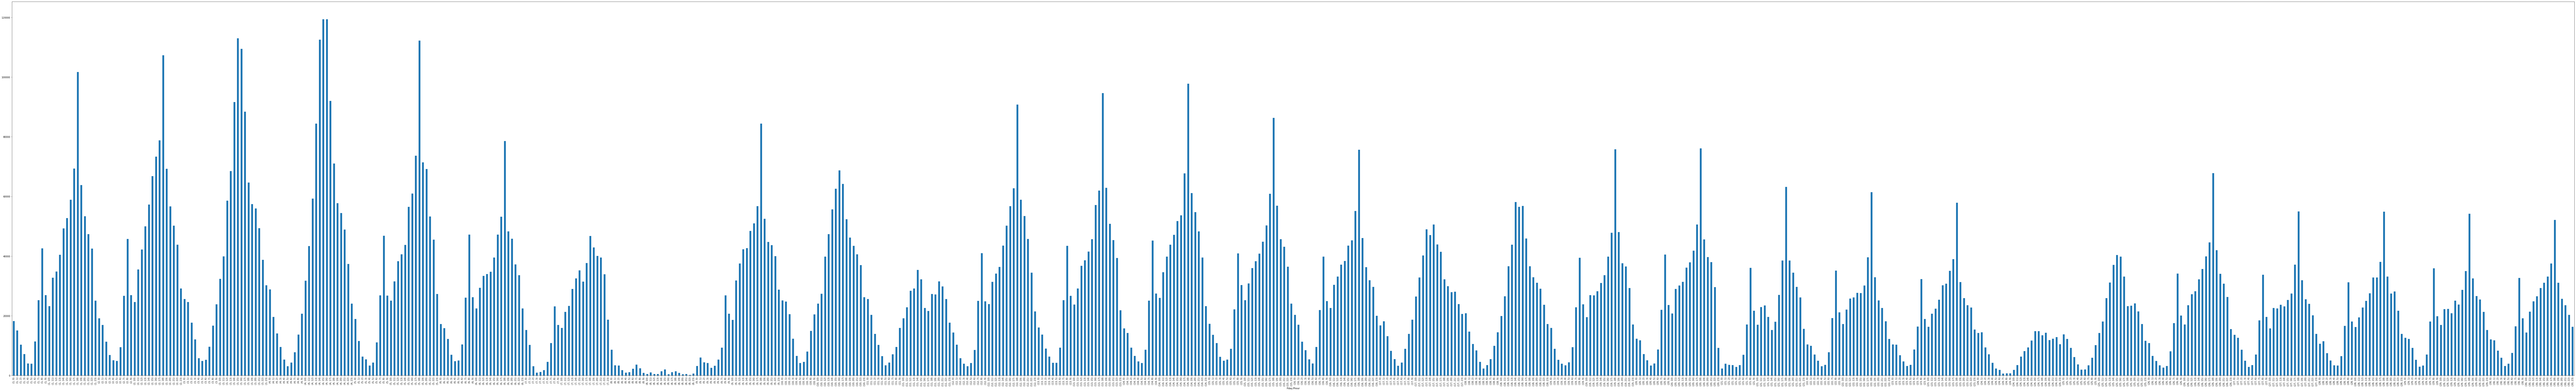

In [55]:
plt.figure(figsize = (200, 30))
ax = plt.axes()
ax.set_facecolor("white")
df[df['Pmonth'] == 11].groupby(['Pday', 'Phour'])['Duration'].sum().plot(kind = 'bar')
plt.show()

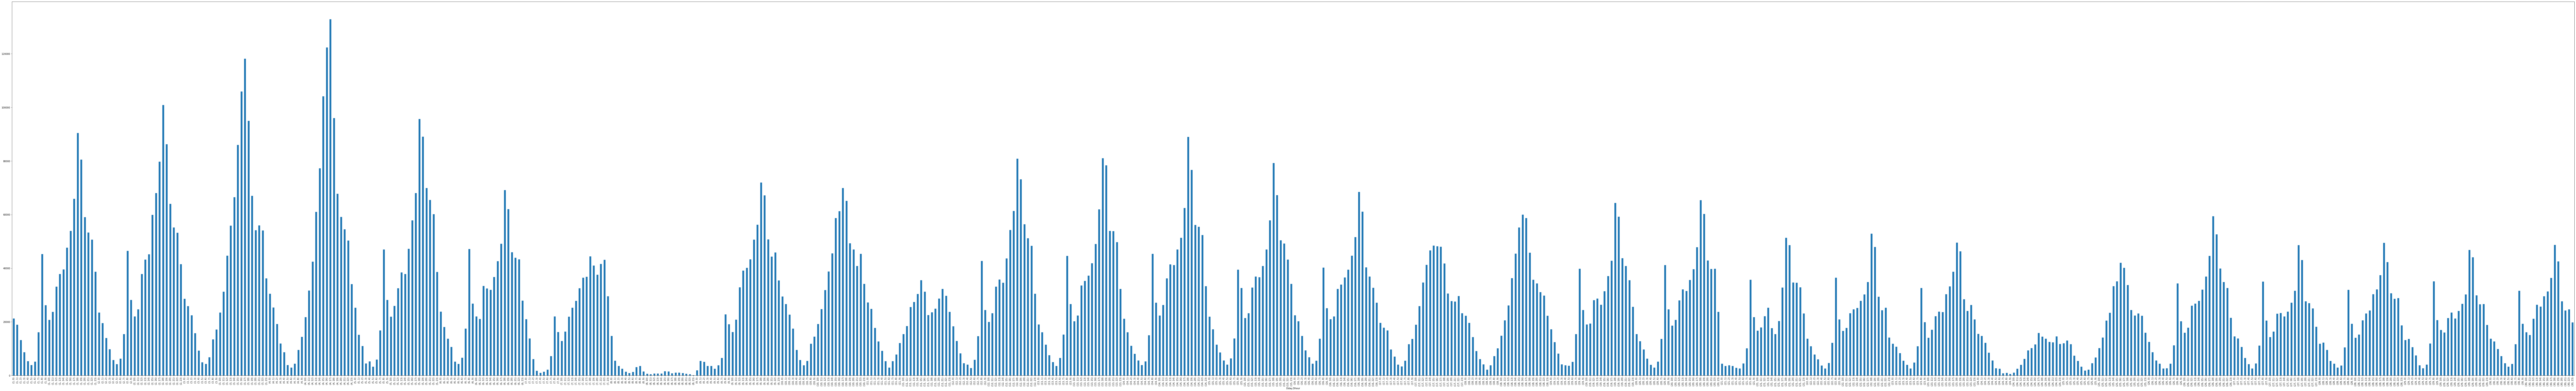

In [56]:
plt.figure(figsize = (200, 30))
ax = plt.axes()
ax.set_facecolor("white")
df[df['Dmonth'] == 11].groupby(['Dday', 'Dhour'])['Duration'].sum().plot(kind = 'bar')
plt.show()

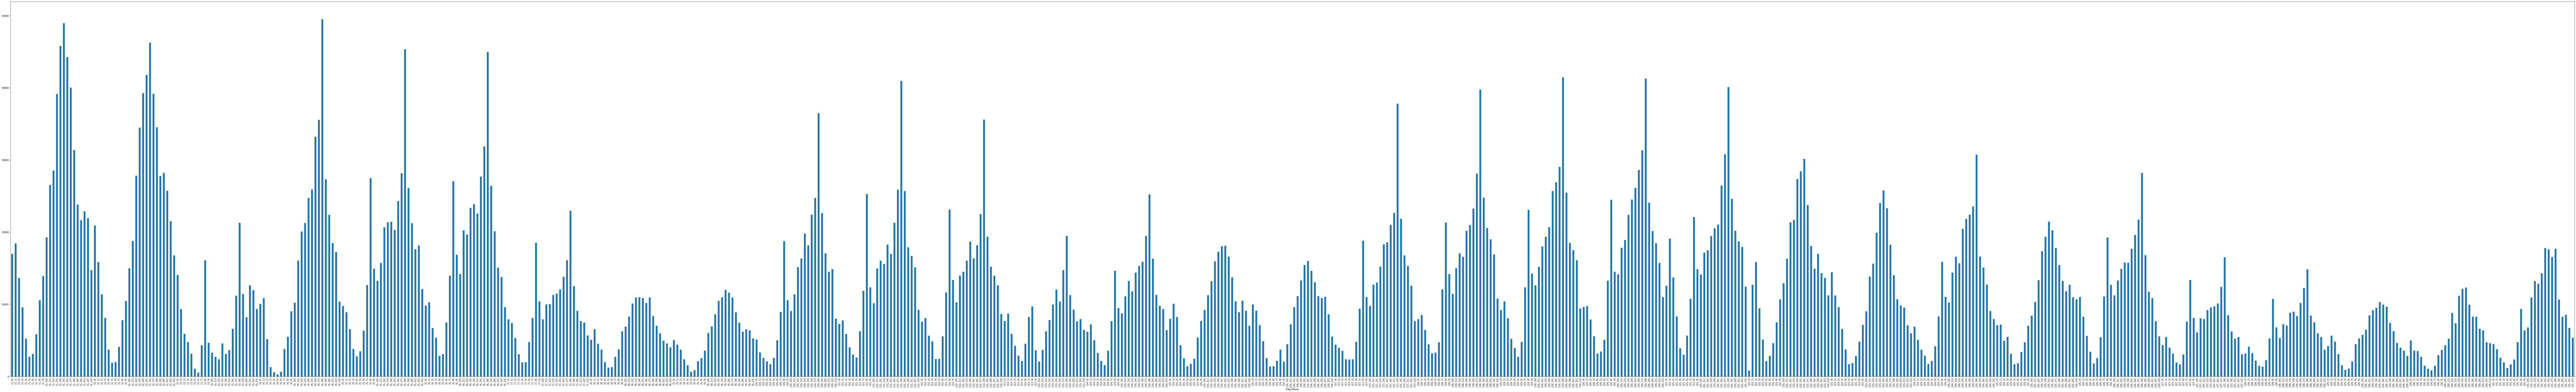

In [57]:
plt.figure(figsize = (200, 30))
ax = plt.axes()
ax.set_facecolor("white")
df[df['Pmonth'] == 12].groupby(['Pday', 'Phour'])['Duration'].sum().plot(kind = 'bar')
plt.show()

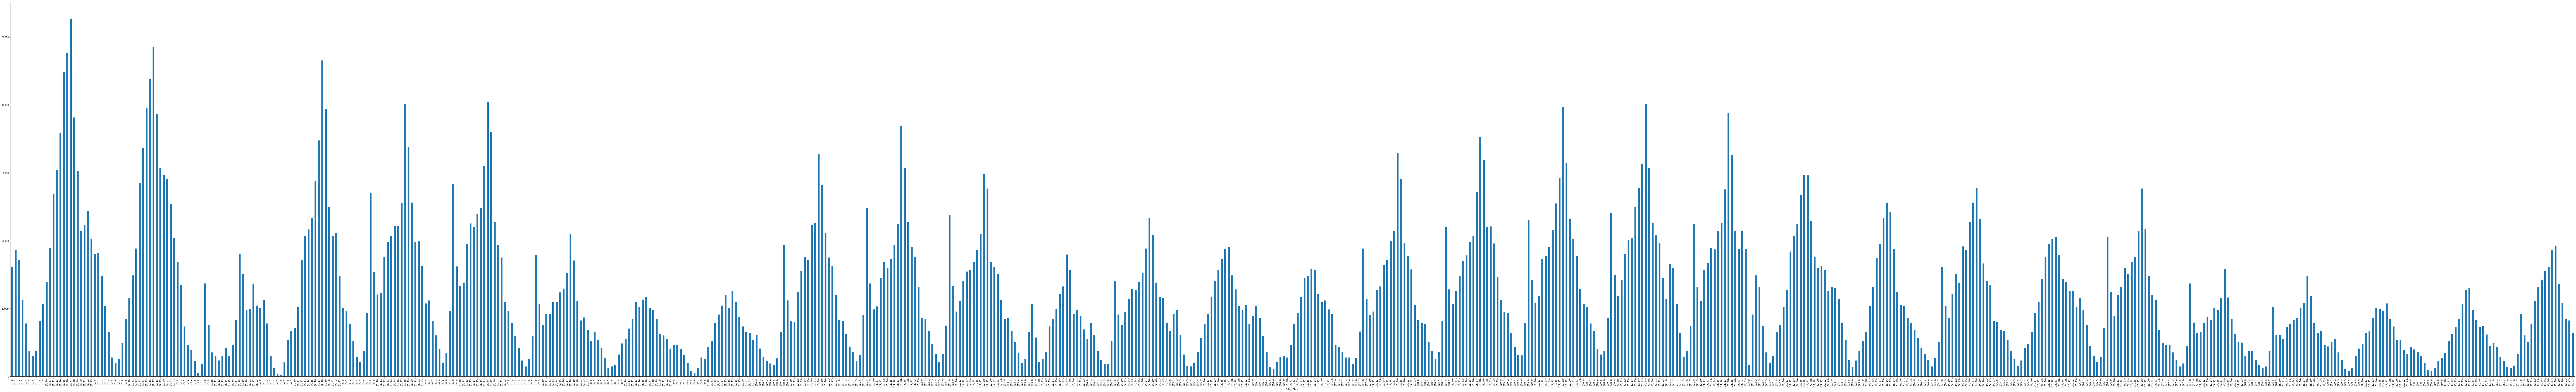

In [58]:
plt.figure(figsize = (200, 30))
ax = plt.axes()
ax.set_facecolor("white")
df[df['Dmonth'] == 12].groupby(['Dday', 'Dhour'])['Duration'].sum().plot(kind = 'bar')
plt.show()

In [59]:
df1 = df.copy()

In [60]:
#Haversine	Pmonth	Pday	Phour	Pmin	PDweek	Dmonth	Dday	Dhour	Dmin	DDweek

In [61]:
df1.drop(['Haversine', 'Pmin', 'Phour', 'Dhour', 'Dmin'], axis =1, inplace = True)

In [62]:
df1

Duration  Distance  Pmonth  Pday  ...  Solar  Snow  GroundTemp  Dust
0               3        50       1     1  ...    0.0   0.0        -2.2    25
1              24      7670       1     1  ...    0.0   0.0        -2.2    25
2               8      1390       1     1  ...    0.0   0.0        -2.2    25
3               8      1820       1     1  ...    0.0   0.0        -2.2    25
4               4       850       1     1  ...    0.0   0.0        -2.2    25
...           ...       ...     ...   ...  ...    ...   ...         ...   ...
9601134        67      6930      12    31  ...    0.0   0.0        -5.1    53
9601135        58      8320      12    31  ...    0.0   0.0        -5.1    53
9601136       118      2730      12    31  ...    0.0   0.0        -5.0    49
9601137        90     17170      12    31  ...    0.0   0.0        -5.1    53
9601138       116      1410      12    31  ...    0.0   0.0        -5.1    53

[9601139 rows x 16 columns]

In [63]:
corrmat = df1.corr()
corrmat

Duration  Distance    Pmonth  ...      Snow  GroundTemp      Dust
Duration    1.000000  0.739233 -0.045792  ... -0.016298    0.120210 -0.021431
Distance    0.739233  1.000000 -0.039448  ... -0.015968    0.067324 -0.035999
Pmonth     -0.045792 -0.039448  1.000000  ... -0.005401   -0.138882 -0.078880
Pday       -0.009698 -0.008762 -0.071412  ...  0.052220   -0.019690  0.081507
PDweek      0.080753  0.051775 -0.011423  ...  0.036894    0.062015 -0.053923
Dmonth     -0.045624 -0.039293  0.999895  ... -0.005395   -0.138867 -0.078963
Dday       -0.009754 -0.008766 -0.070988  ...  0.052137   -0.019646  0.081351
DDweek      0.081320  0.052295 -0.011388  ...  0.036908    0.061616 -0.053423
Temp        0.128204  0.097193 -0.107571  ... -0.116919    0.902920 -0.227242
Precip     -0.009453 -0.008845 -0.004803  ...  0.011267    0.002981 -0.028341
Wind        0.072325  0.031359 -0.180299  ... -0.010702    0.194507  0.115833
Humid      -0.096916 -0.034934  0.023937  ...  0.060919   -0.106779 -0.194931
Solar       0.072224 -0.003397 -0.136788  ... -0.025255    0.614643  0.202873
Snow       -0.016298 -0.015968 -0.005401  ...  1.000000   -0.098555  0.007930
GroundTemp  0.120210  0.067324 -0.138882  ... -0.098555    1.000000 -0.116394
Dust       -0.021431 -0.035999 -0.078880  ...  0.007930   -0.116394  1.000000

[16 rows x 16 columns]

In [64]:
import seaborn as sns

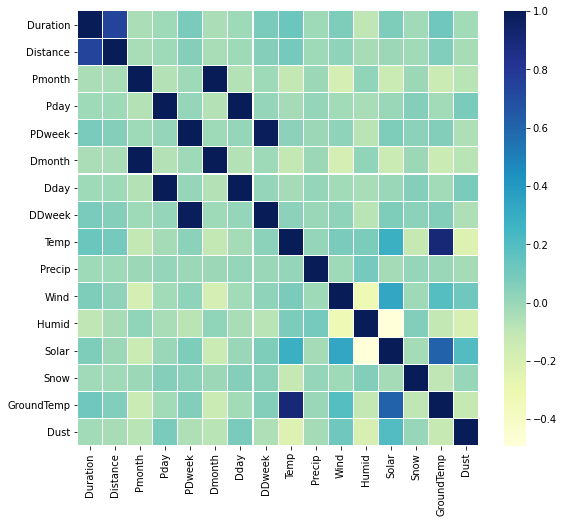

In [65]:
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [66]:
corrmat1 = df.corr()
corrmat1

Duration  Distance  Haversine  ...      Snow  GroundTemp      Dust
Duration    1.000000  0.739233   0.352915  ... -0.016298    0.120210 -0.021431
Distance    0.739233  1.000000   0.579833  ... -0.015968    0.067324 -0.035999
Haversine   0.352915  0.579833   1.000000  ... -0.010264    0.001582 -0.017494
Pmonth     -0.045792 -0.039448  -0.025563  ... -0.005401   -0.138882 -0.078880
Pday       -0.009698 -0.008762  -0.003292  ...  0.052220   -0.019690  0.081507
Phour       0.133392  0.098925   0.012234  ... -0.018915    0.090802 -0.029922
Pmin       -0.003832 -0.010254  -0.018058  ...  0.002984    0.013429  0.005487
PDweek      0.080753  0.051775  -0.000833  ...  0.036894    0.062015 -0.053923
Dmonth     -0.045624 -0.039293  -0.025509  ... -0.005395   -0.138867 -0.078963
Dday       -0.009754 -0.008766  -0.003257  ...  0.052137   -0.019646  0.081351
Dhour       0.140381  0.095262   0.015552  ... -0.017585    0.112484 -0.008838
Dmin       -0.012516 -0.006631   0.000907  ...  0.000178   -0.005511  0.001416
DDweek      0.081320  0.052295  -0.000186  ...  0.036908    0.061616 -0.053423
Temp        0.128204  0.097193   0.026427  ... -0.116919    0.902920 -0.227242
Precip     -0.009453 -0.008845  -0.005499  ...  0.011267    0.002981 -0.028341
Wind        0.072325  0.031359   0.001807  ... -0.010702    0.194507  0.115833
Humid      -0.096916 -0.034934   0.006978  ...  0.060919   -0.106779 -0.194931
Solar       0.072224 -0.003397  -0.039256  ... -0.025255    0.614643  0.202873
Snow       -0.016298 -0.015968  -0.010264  ...  1.000000   -0.098555  0.007930
GroundTemp  0.120210  0.067324   0.001582  ... -0.098555    1.000000 -0.116394
Dust       -0.021431 -0.035999  -0.017494  ...  0.007930   -0.116394  1.000000

[21 rows x 21 columns]

In [67]:
"""
Early Morning = 3 am to 7 am (1)
Morning = 8 am to 11 am (2)
Noon = 12 am  to 14 pm (3)
Afternoon = 15 to 17 pm (4)
Evening = 18 to 20 pm (5)
Night = 21 to 24 pm (6)
Mid Night = 1 to 2 am (7)
"""

'\nEarly Morning = 3 am to 7 am\nMorning = 8 am to 11 am\nNoon = 12 am  to 14 pm\nAfternoon = 15 to 17 pm\nEvening = 18 to 20 pm\nNight = 21 to 24 pm\nMid Night = 1 to 2 am\n'

In [87]:
replace_map = {1: 7, 2: 7, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1 , 8: 2 , 9: 2,10: 2, 11: 2, 12: 3, 13:3, 14: 3, 15: 4, 16: 4, 17: 4, 18: 5, 19: 5, 20: 5, 21: 6, 22: 6, 23: 6, 24:6}

In [71]:
df2 = df.copy()

In [72]:
df2['Phour'] = df2['Phour'].astype('category')

In [74]:
df2['Phour'].dtype

CategoricalDtype(categories=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
                  15, 16, 17, 18, 19, 20, 21, 22, 23],
                 ordered=False)

In [90]:
df2.replace({"Phour": replace_map}, inplace=True)

In [91]:
df2.replace({"Dhour": replace_map}, inplace=True)

In [92]:
df2.drop('Phour_1', axis =1, inplace=True)

In [94]:
df2

Duration  Distance  Haversine  Pmonth  ...  Solar  Snow  GroundTemp  Dust
0               3        50   0.000000       1  ...    0.0   0.0        -2.2    25
1              24      7670   5.713529       1  ...    0.0   0.0        -2.2    25
2               8      1390   0.913702       1  ...    0.0   0.0        -2.2    25
3               8      1820   1.468027       1  ...    0.0   0.0        -2.2    25
4               4       850   0.823227       1  ...    0.0   0.0        -2.2    25
...           ...       ...        ...     ...  ...    ...   ...         ...   ...
9601134        67      6930   0.000000      12  ...    0.0   0.0        -5.1    53
9601135        58      8320   4.402263      12  ...    0.0   0.0        -5.1    53
9601136       118      2730   1.389156      12  ...    0.0   0.0        -5.0    49
9601137        90     17170   8.779306      12  ...    0.0   0.0        -5.1    53
9601138       116      1410   0.000000      12  ...    0.0   0.0        -5.1    53

[9601139 rows x 21 columns]

In [93]:
corrmat2 = df2.corr()
corrmat2

Duration  Distance  Haversine  ...      Snow  GroundTemp      Dust
Duration    1.000000  0.739233   0.352915  ... -0.016298    0.120210 -0.021431
Distance    0.739233  1.000000   0.579833  ... -0.015968    0.067324 -0.035999
Haversine   0.352915  0.579833   1.000000  ... -0.010264    0.001582 -0.017494
Pmonth     -0.045792 -0.039448  -0.025563  ... -0.005401   -0.138882 -0.078880
Pday       -0.009698 -0.008762  -0.003292  ...  0.052220   -0.019690  0.081507
Phour       0.099121  0.088365   0.040436  ... -0.015714   -0.029634 -0.084136
Pmin       -0.003832 -0.010254  -0.018058  ...  0.002984    0.013429  0.005487
PDweek      0.080753  0.051775  -0.000833  ...  0.036894    0.062015 -0.053923
Dmonth     -0.045624 -0.039293  -0.025509  ... -0.005395   -0.138867 -0.078963
Dday       -0.009754 -0.008766  -0.003257  ...  0.052137   -0.019646  0.081351
Dhour       0.136662  0.108935   0.050036  ... -0.015610   -0.007760 -0.074657
Dmin       -0.012516 -0.006631   0.000907  ...  0.000178   -0.005511  0.001416
DDweek      0.081320  0.052295  -0.000186  ...  0.036908    0.061616 -0.053423
Temp        0.128204  0.097193   0.026427  ... -0.116919    0.902920 -0.227242
Precip     -0.009453 -0.008845  -0.005499  ...  0.011267    0.002981 -0.028341
Wind        0.072325  0.031359   0.001807  ... -0.010702    0.194507  0.115833
Humid      -0.096916 -0.034934   0.006978  ...  0.060919   -0.106779 -0.194931
Solar       0.072224 -0.003397  -0.039256  ... -0.025255    0.614643  0.202873
Snow       -0.016298 -0.015968  -0.010264  ...  1.000000   -0.098555  0.007930
GroundTemp  0.120210  0.067324   0.001582  ... -0.098555    1.000000 -0.116394
Dust       -0.021431 -0.035999  -0.017494  ...  0.007930   -0.116394  1.000000

[21 rows x 21 columns]

In [95]:
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6367 * c
    return km

In [96]:
c = ['Pmonth',	'Pday',	'Pmin',	'PDweek',	'Dmonth',	'Dday',	'Dmin',	'DDweek', 'Precip',	'Wind',	'Humid',	'Solar',	'Snow', 'Dust']

In [113]:
df_final = df.drop(c, axis = 1)

In [114]:
df_final.head()

Duration  Distance  Haversine  Phour  Dhour  Temp  GroundTemp
0         3        50   0.000000      0      0  -3.2        -2.2
1        24      7670   5.713529      0      0  -3.2        -2.2
2         8      1390   0.913702      0      0  -3.2        -2.2
3         8      1820   1.468027      0      0  -3.2        -2.2
4         4       850   0.823227      0      0  -3.2        -2.2

In [115]:
df_final.to_parquet('seoul_final.parquet', index = False)